### INITIALIZE (Run only once per session)

In [3]:
using CSV, DataFrames, Random, Statistics, CairoMakie
using Sawit
include("src/preamble.jl")
println("No. of threads: $(Threads.nthreads())")

No. of threads: 1


### RUN MODEL: One Site

Site = rengam
Planting densities = [82, 90, 100, 111, 123, 136, 166, 184]
Input JSON file = D:\OneDrive\Julia\Sawit/data/rengam/input.json
Running modeling scenarios...
Completed in 13 seconds, 895 milliseconds.
Validating model results...


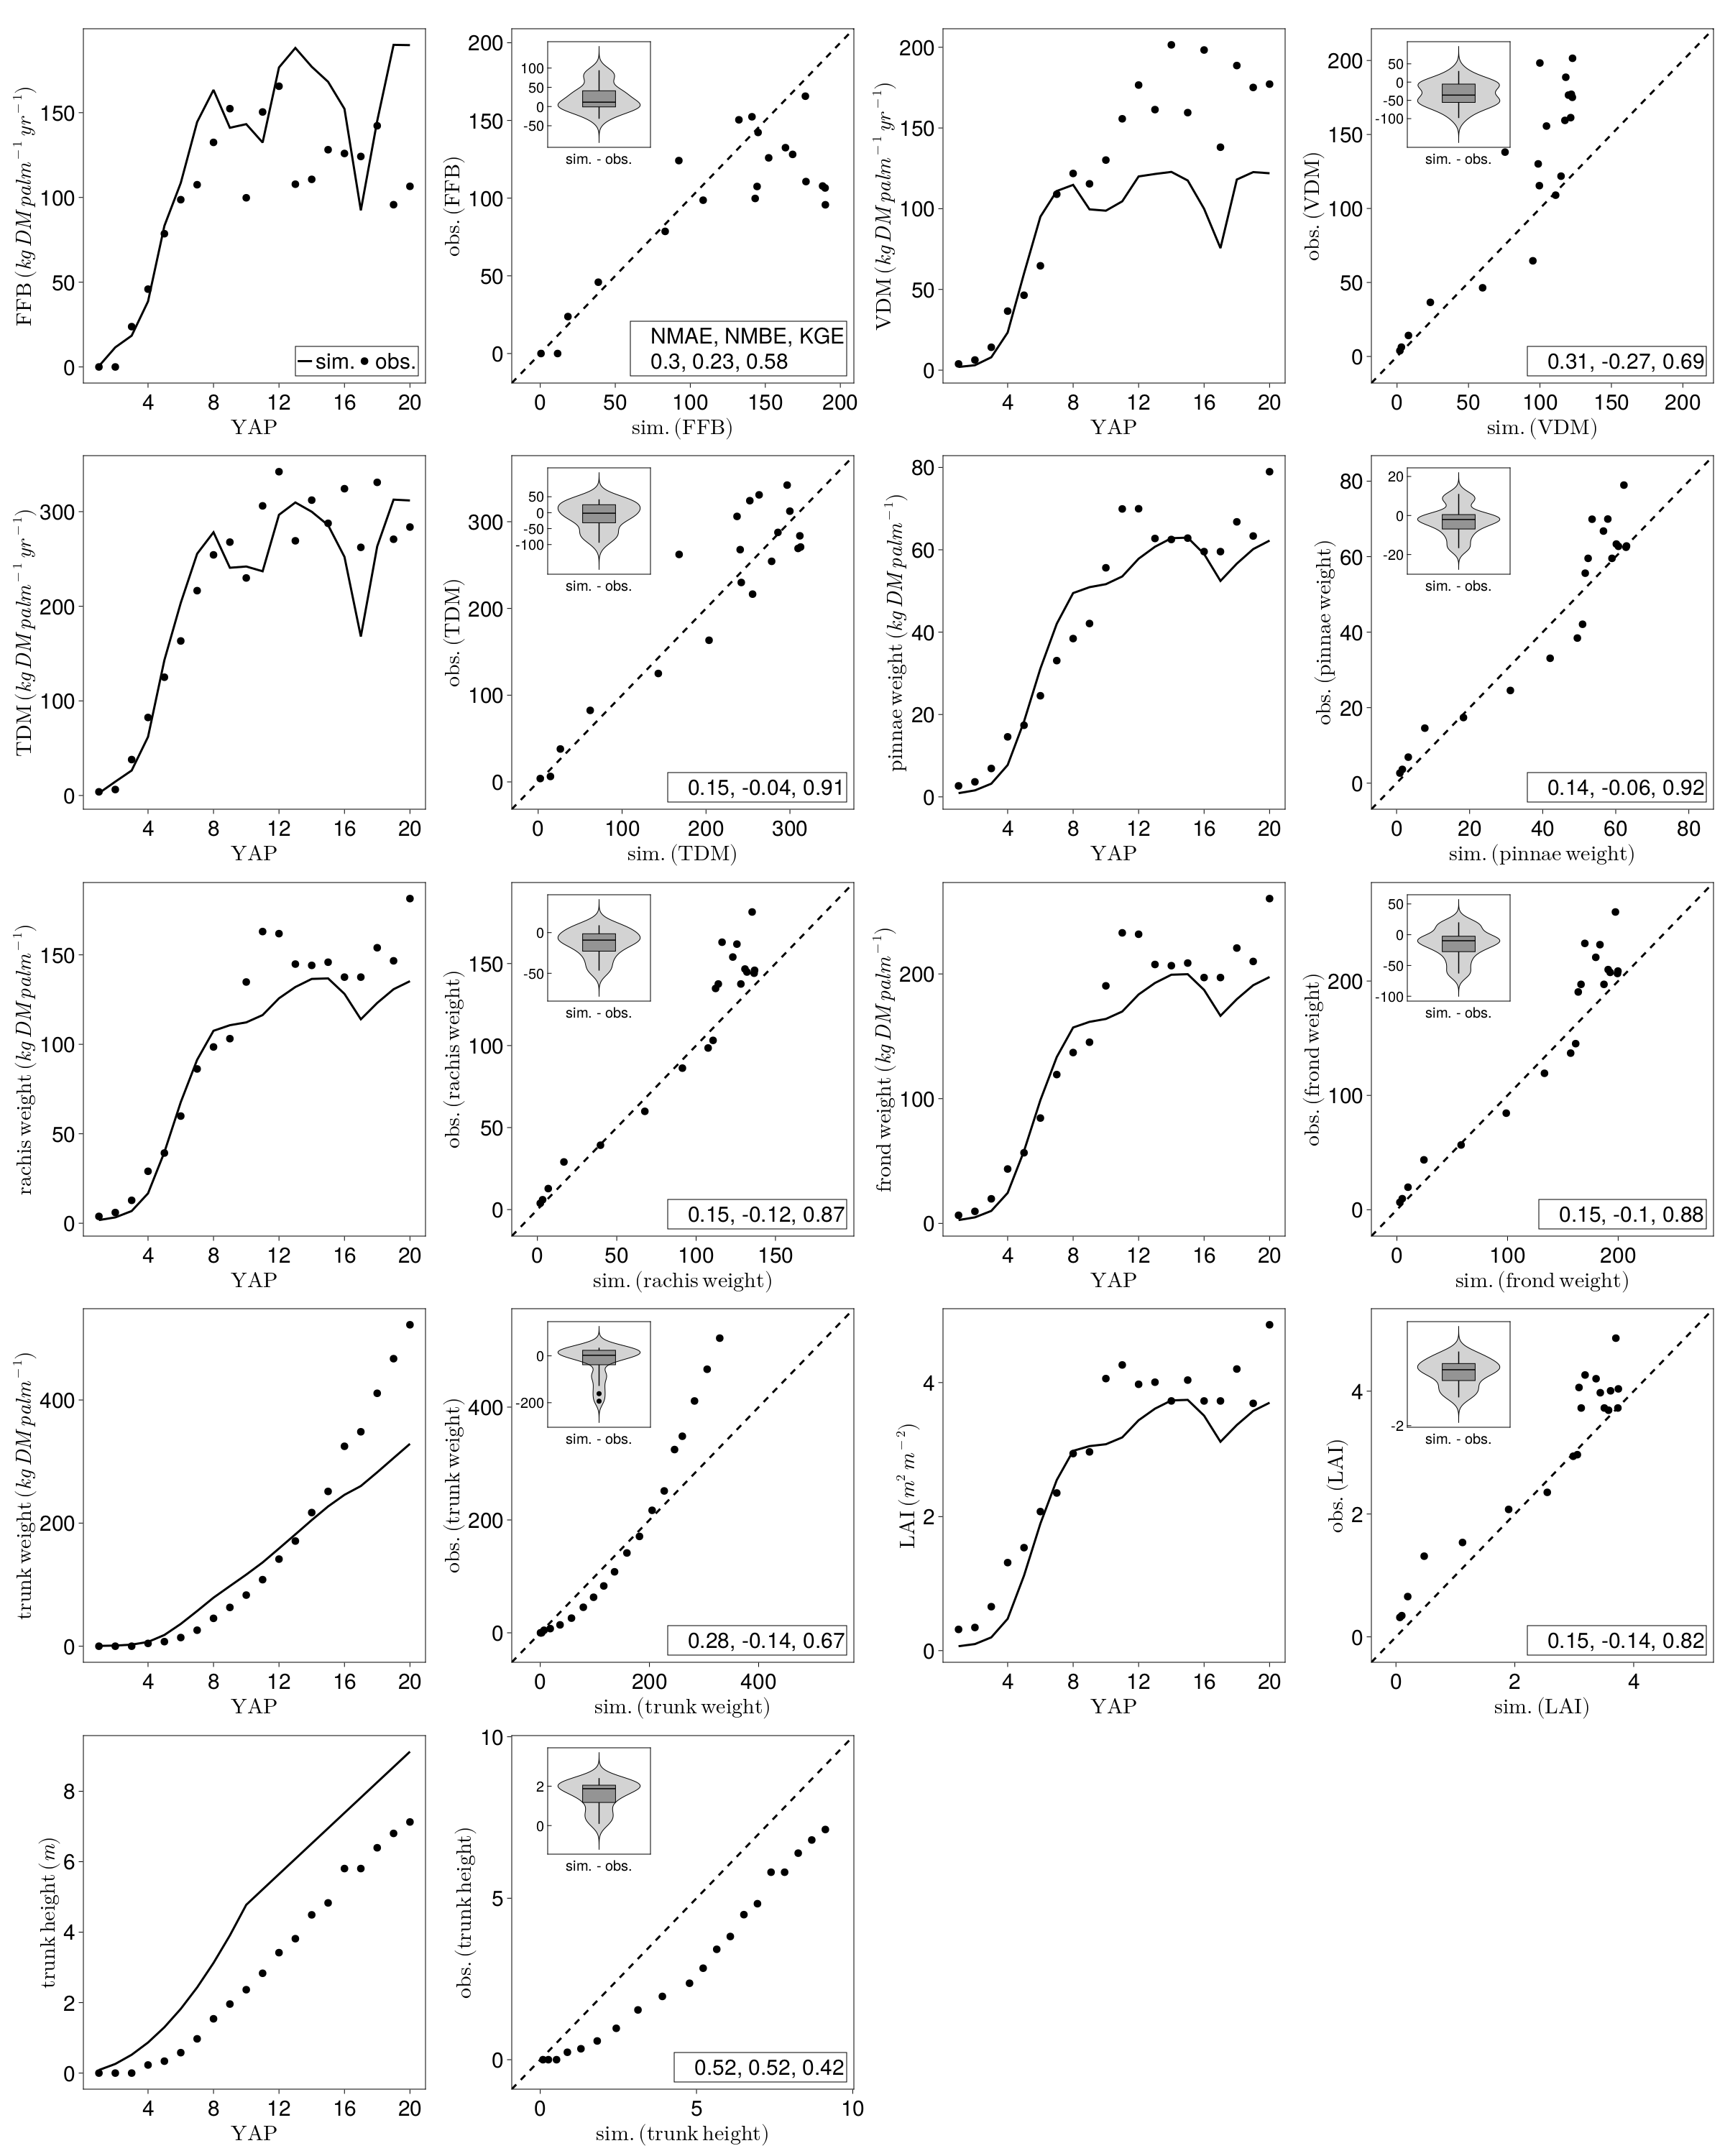

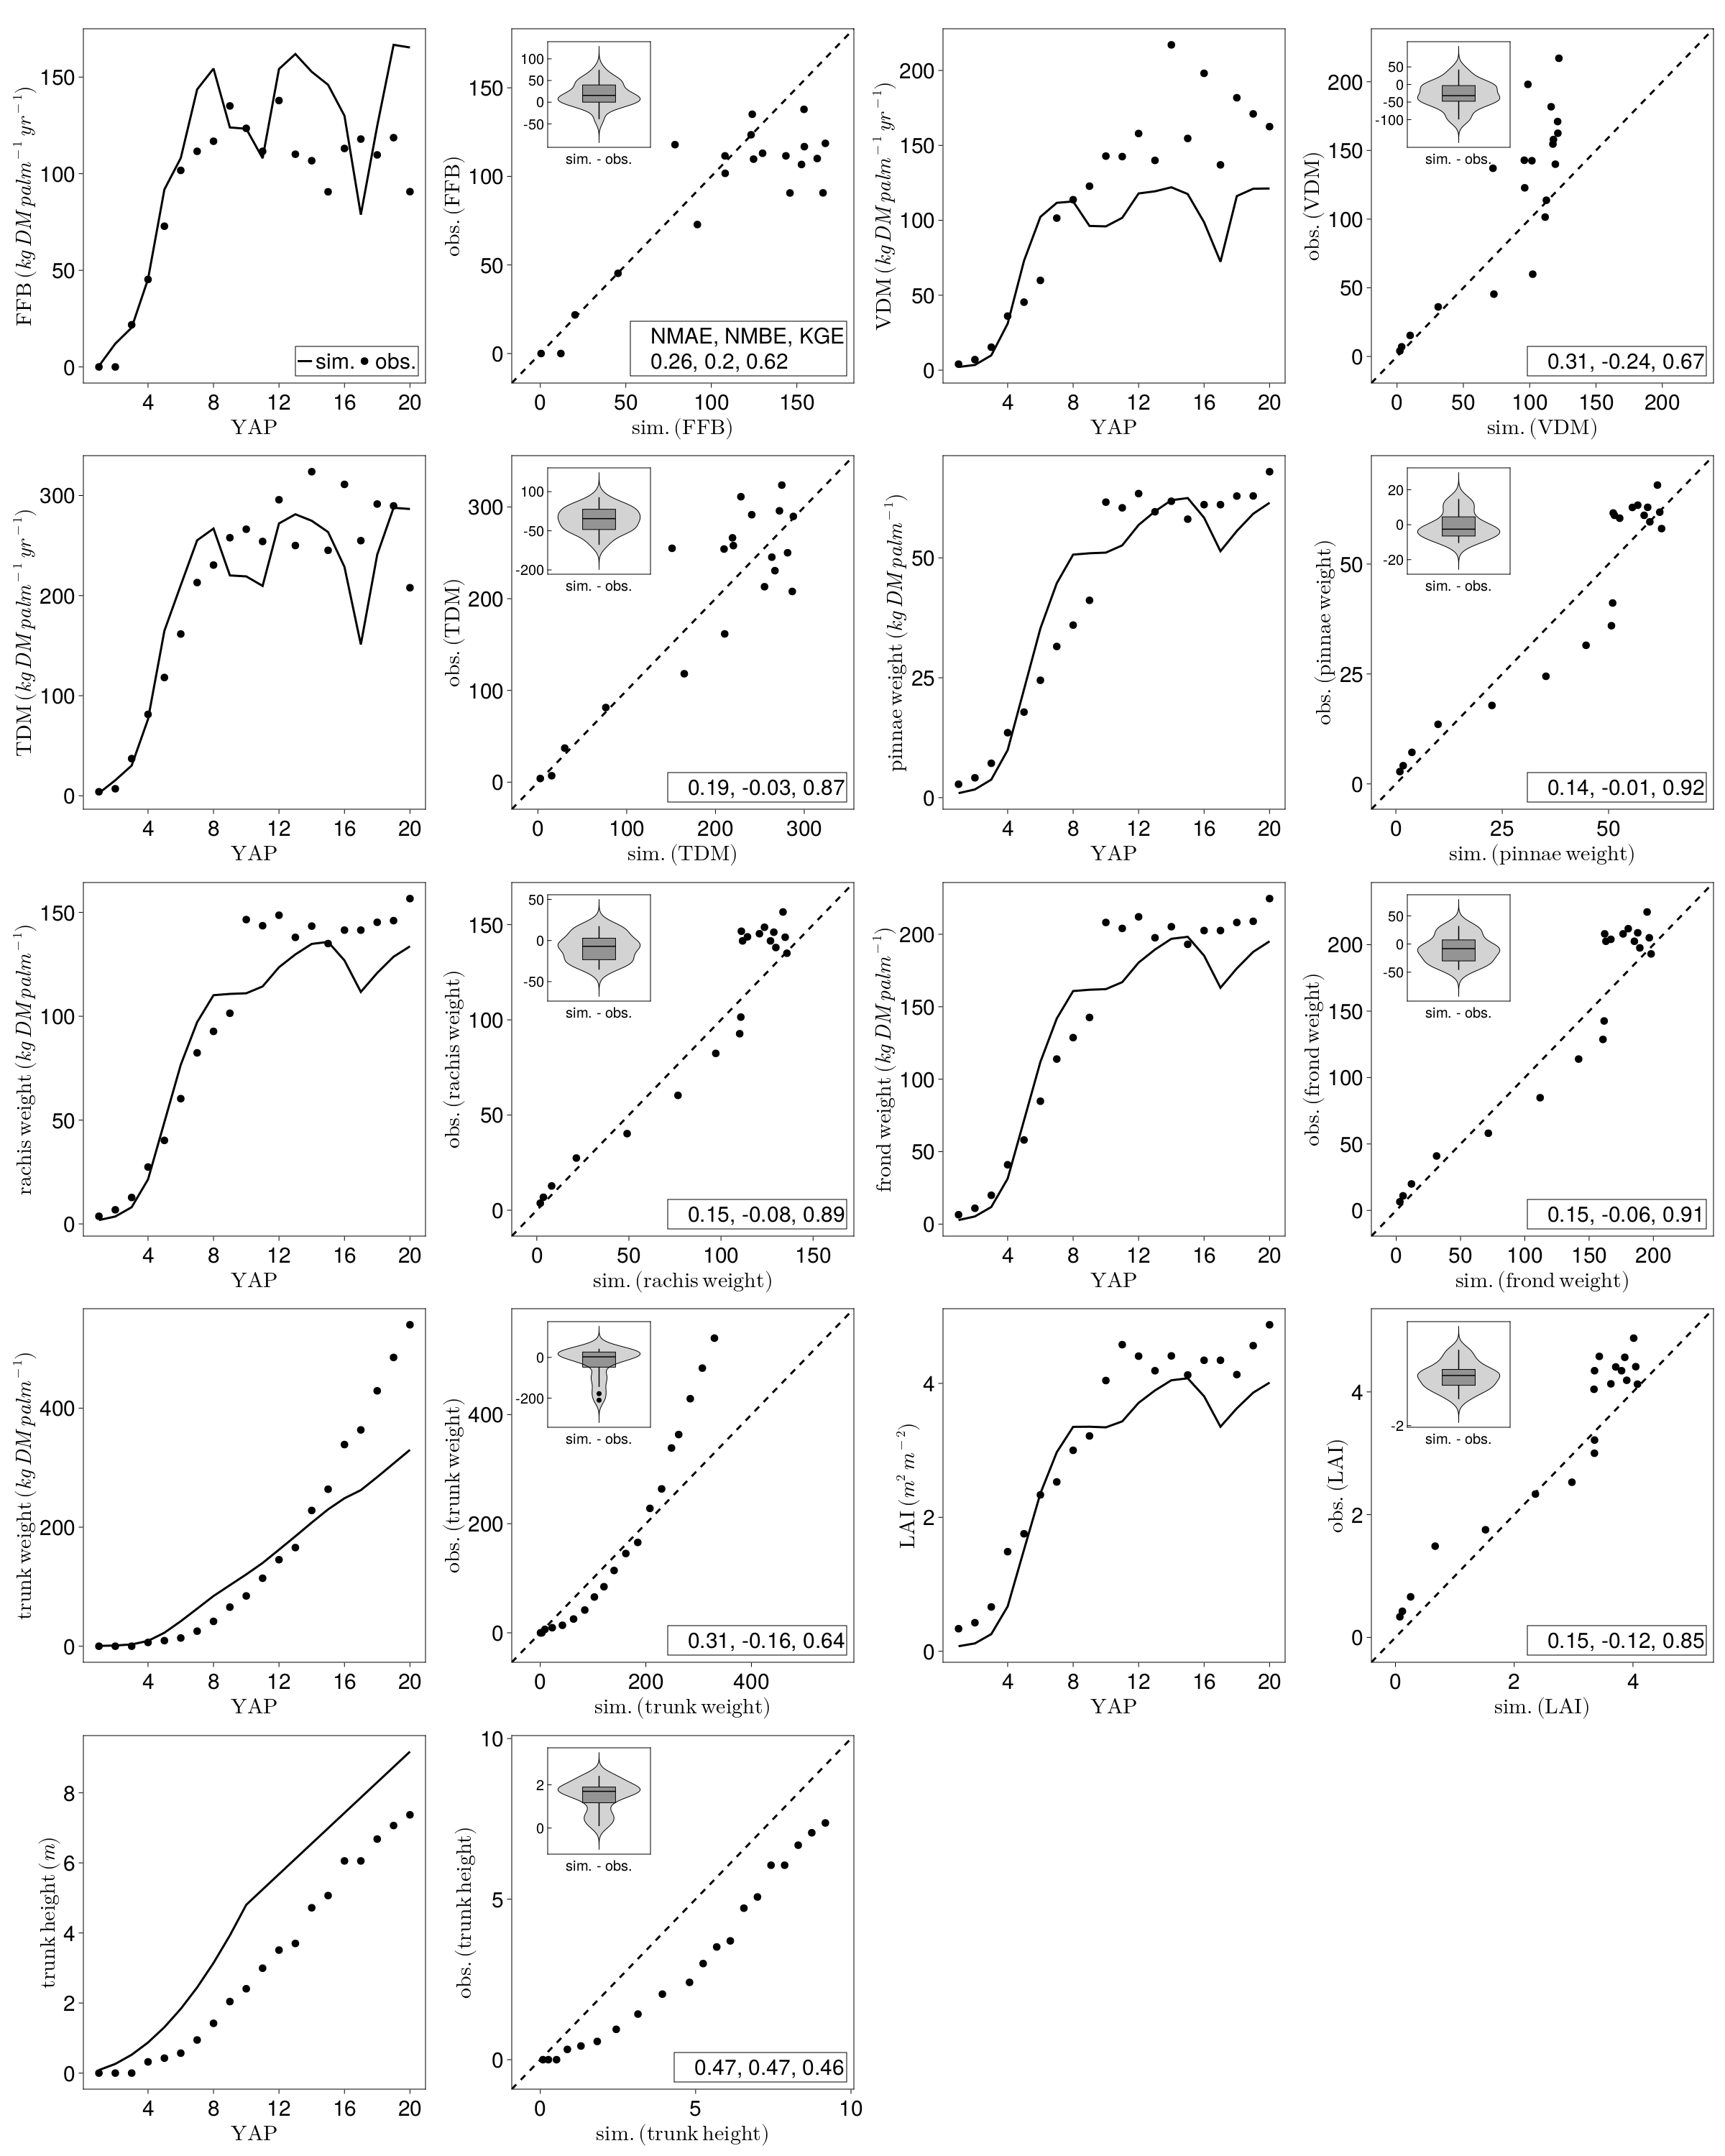

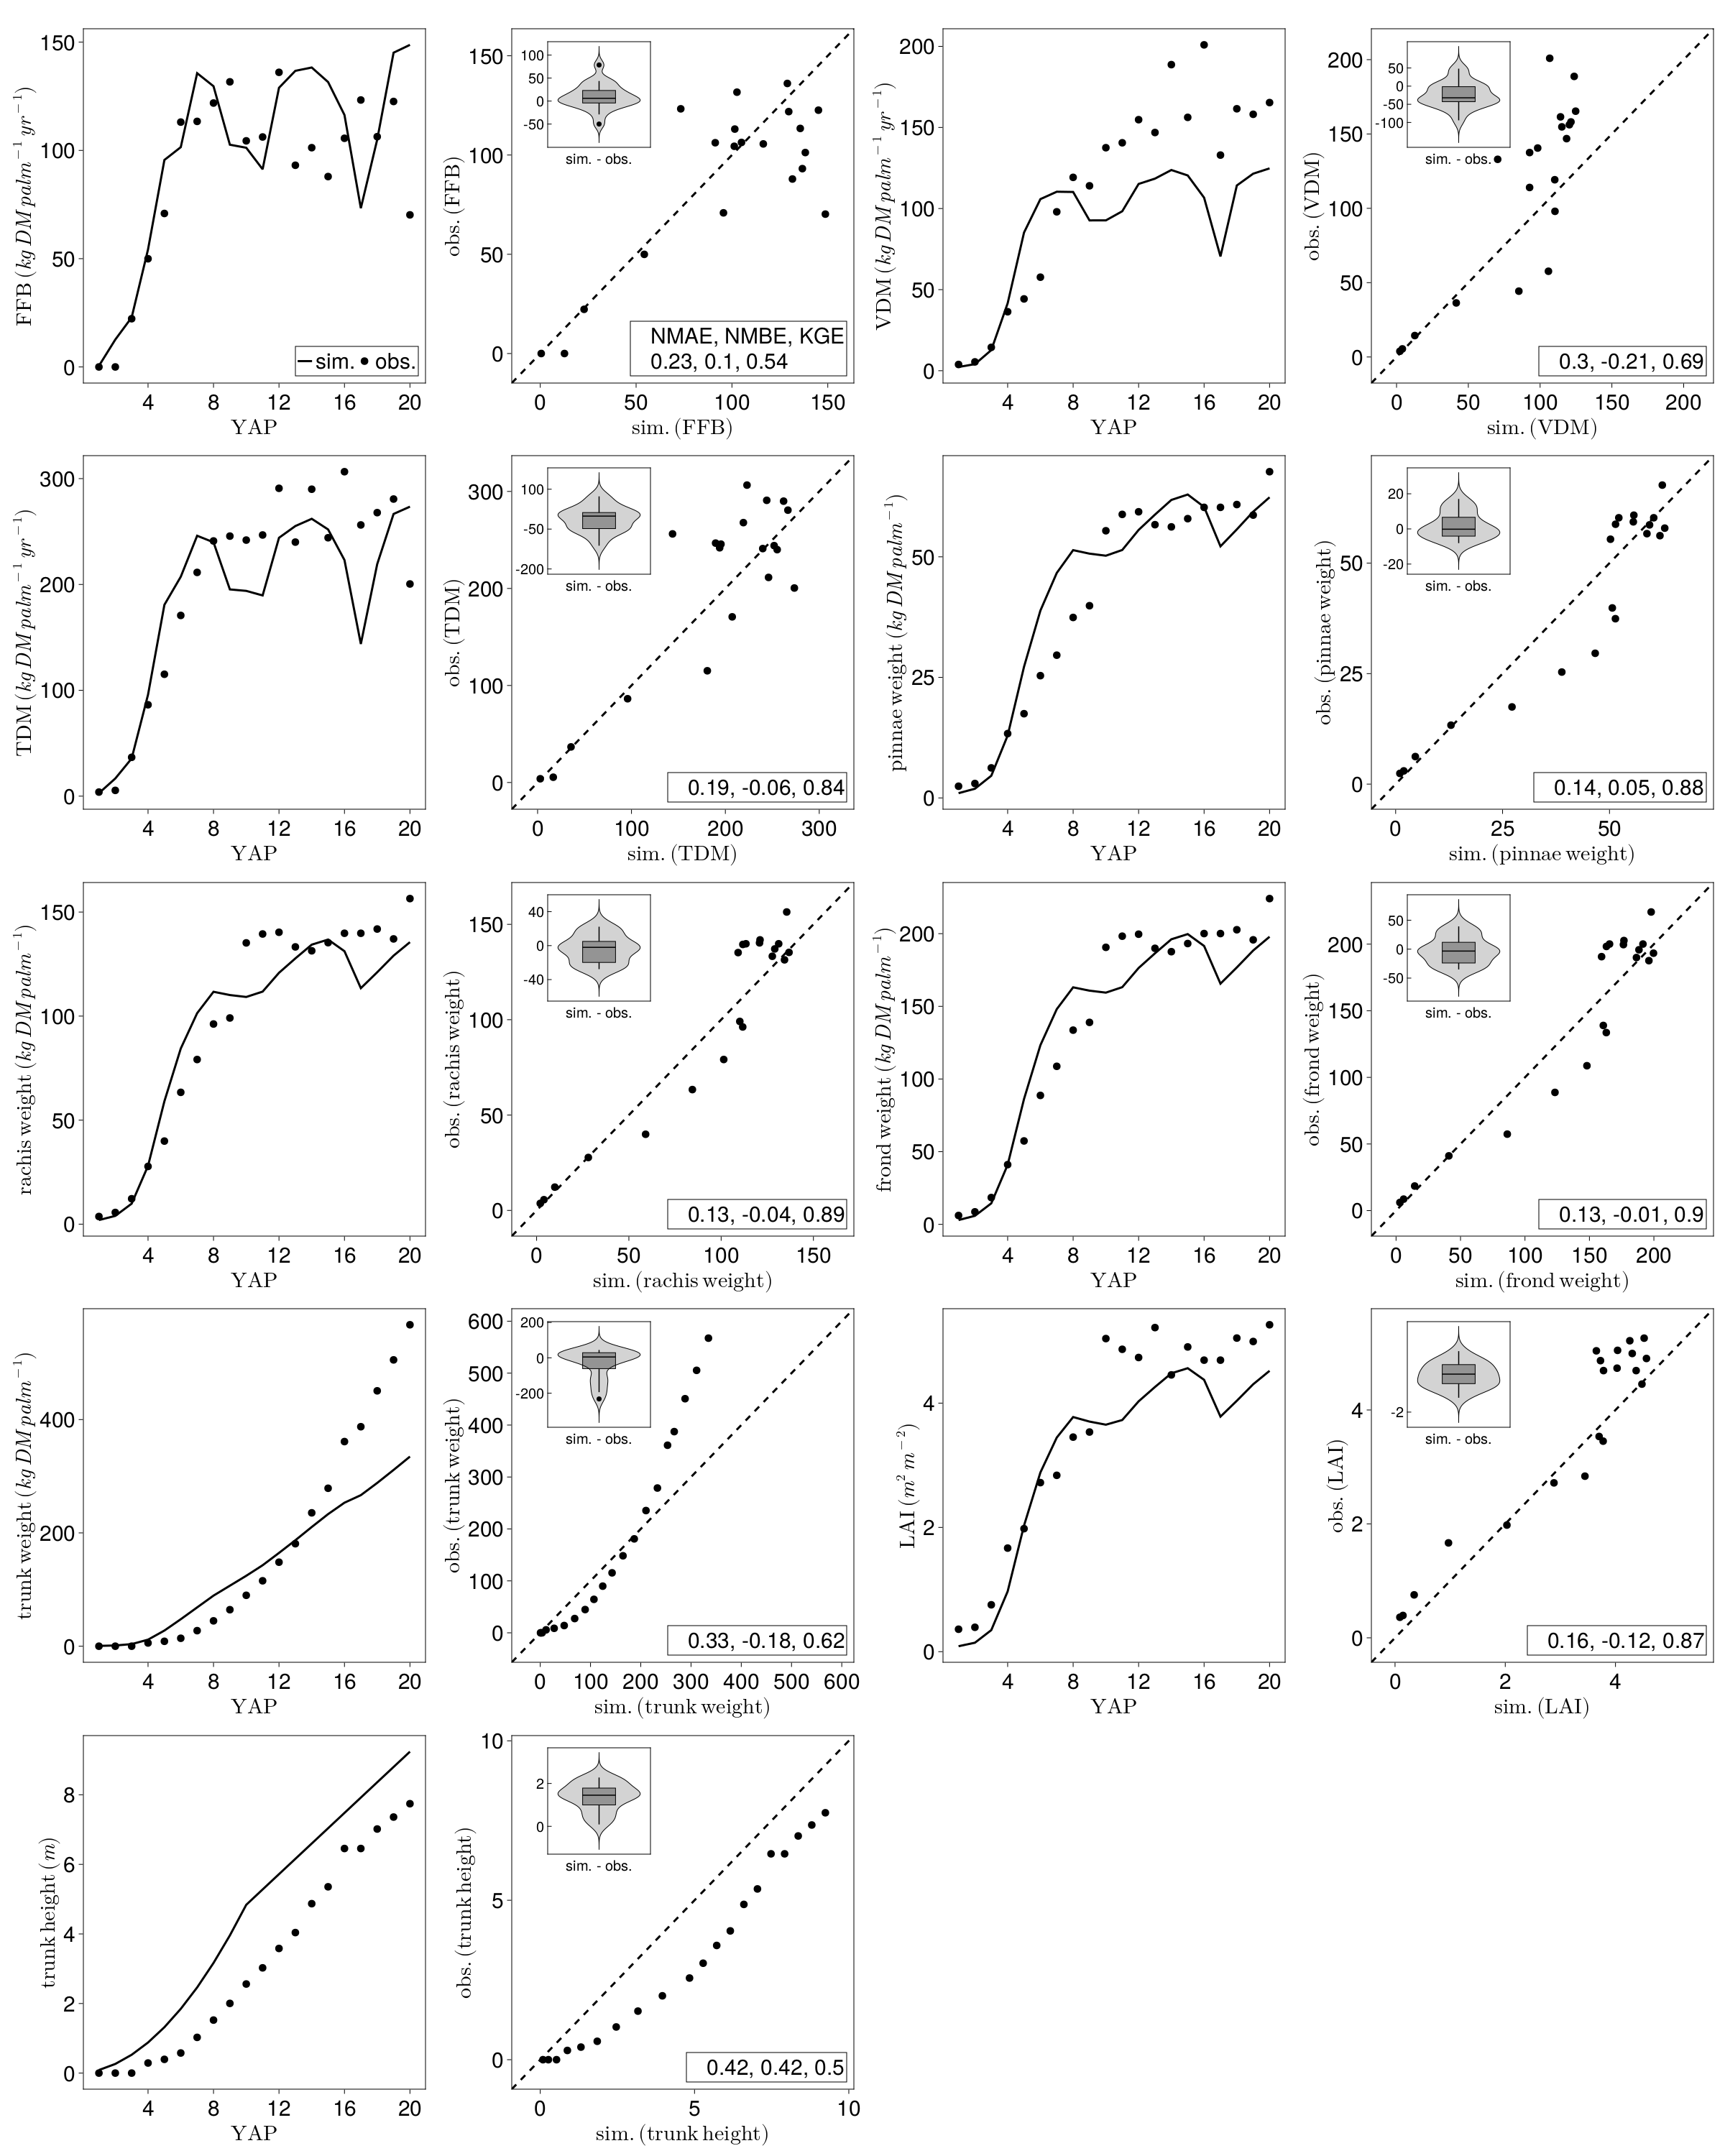

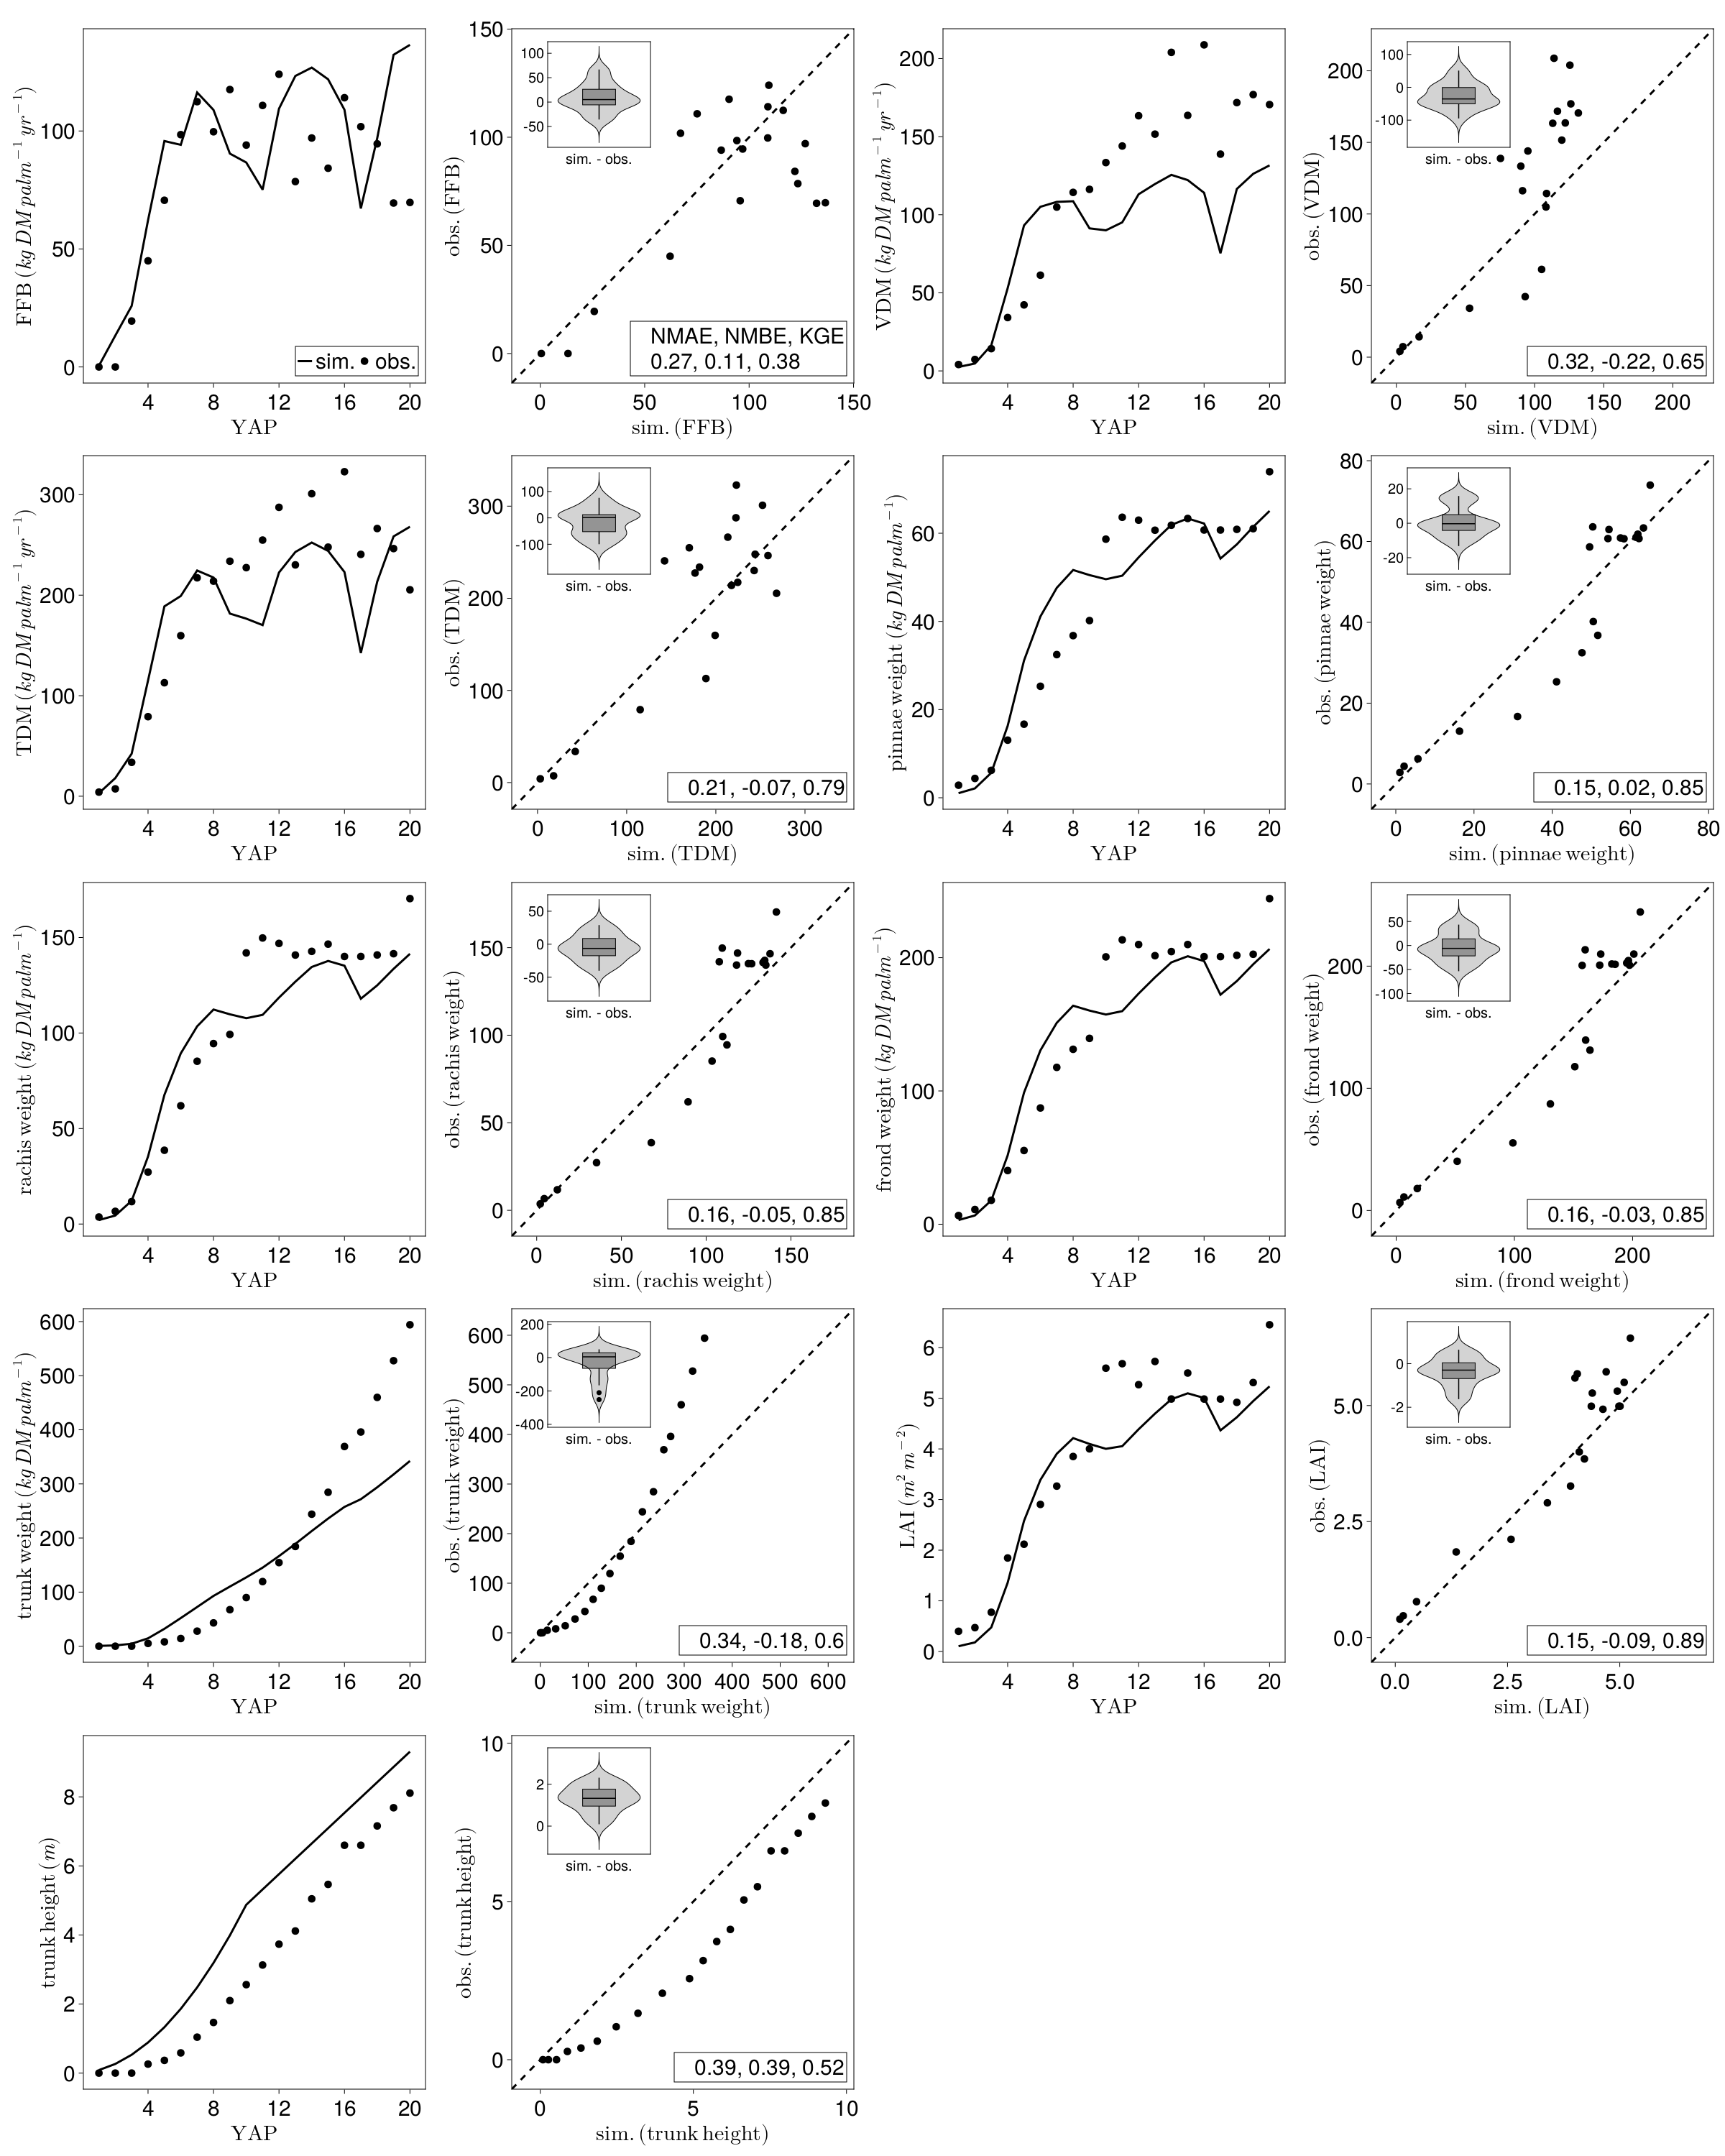

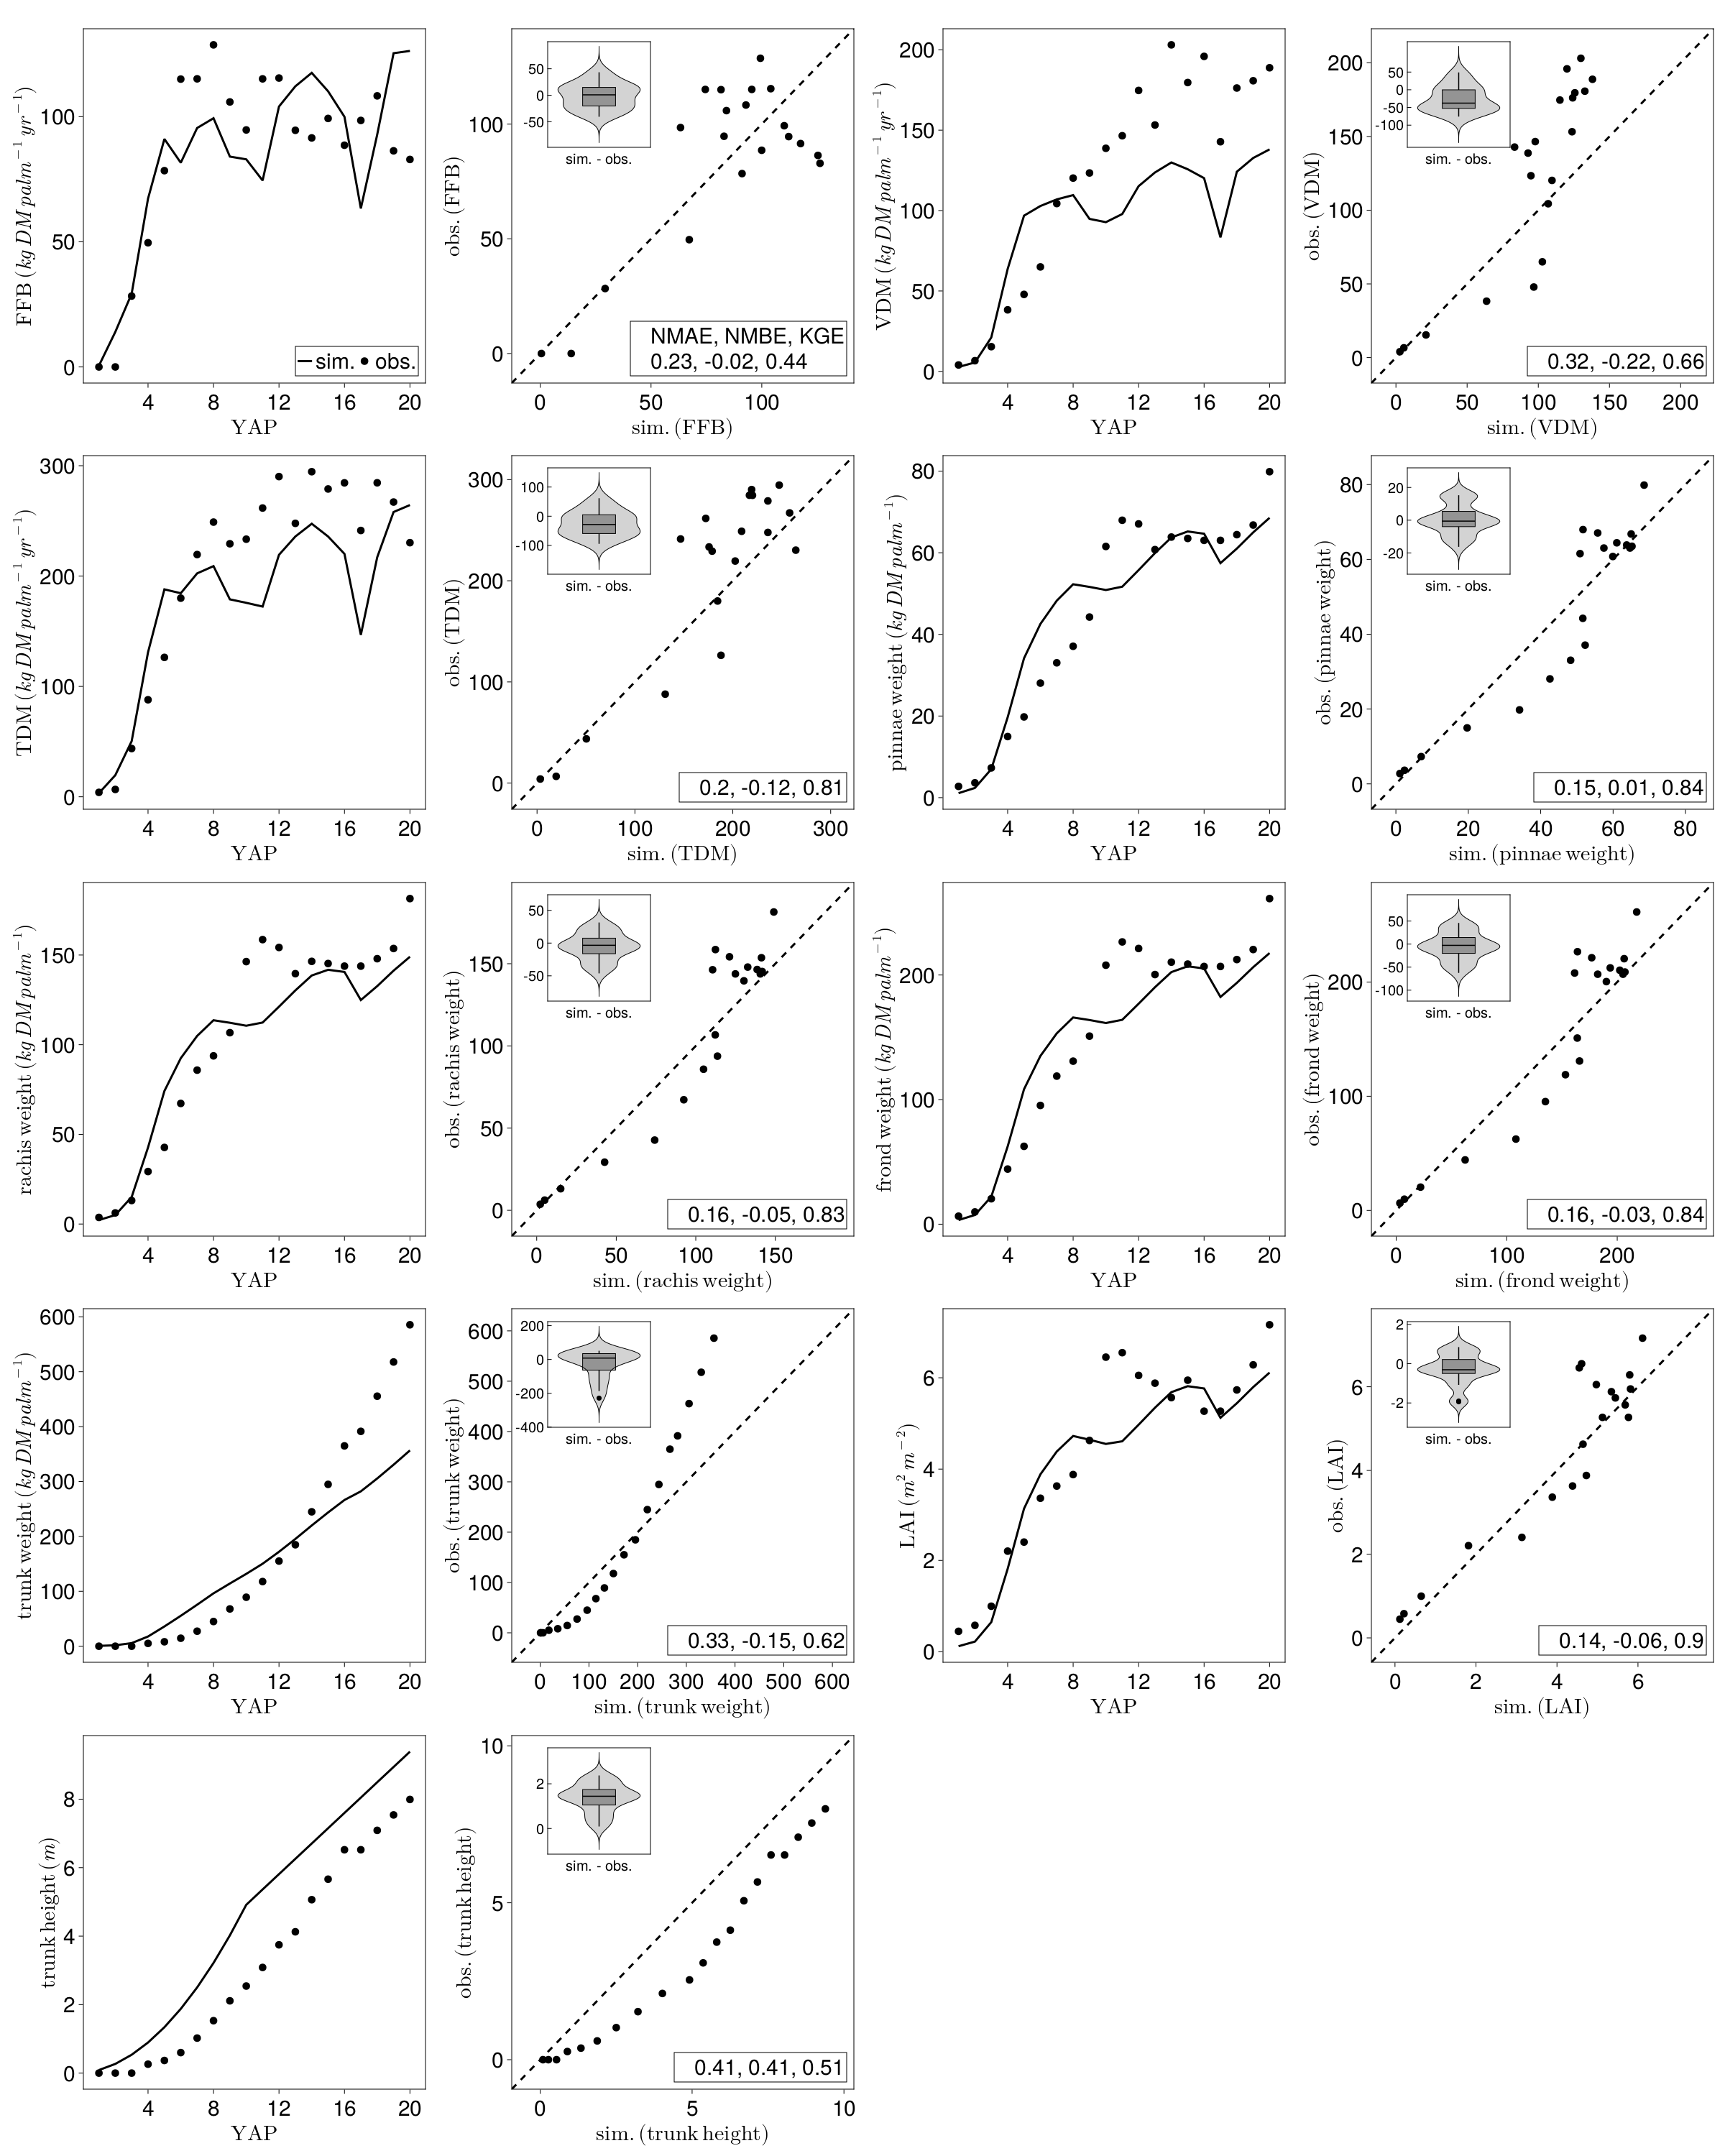

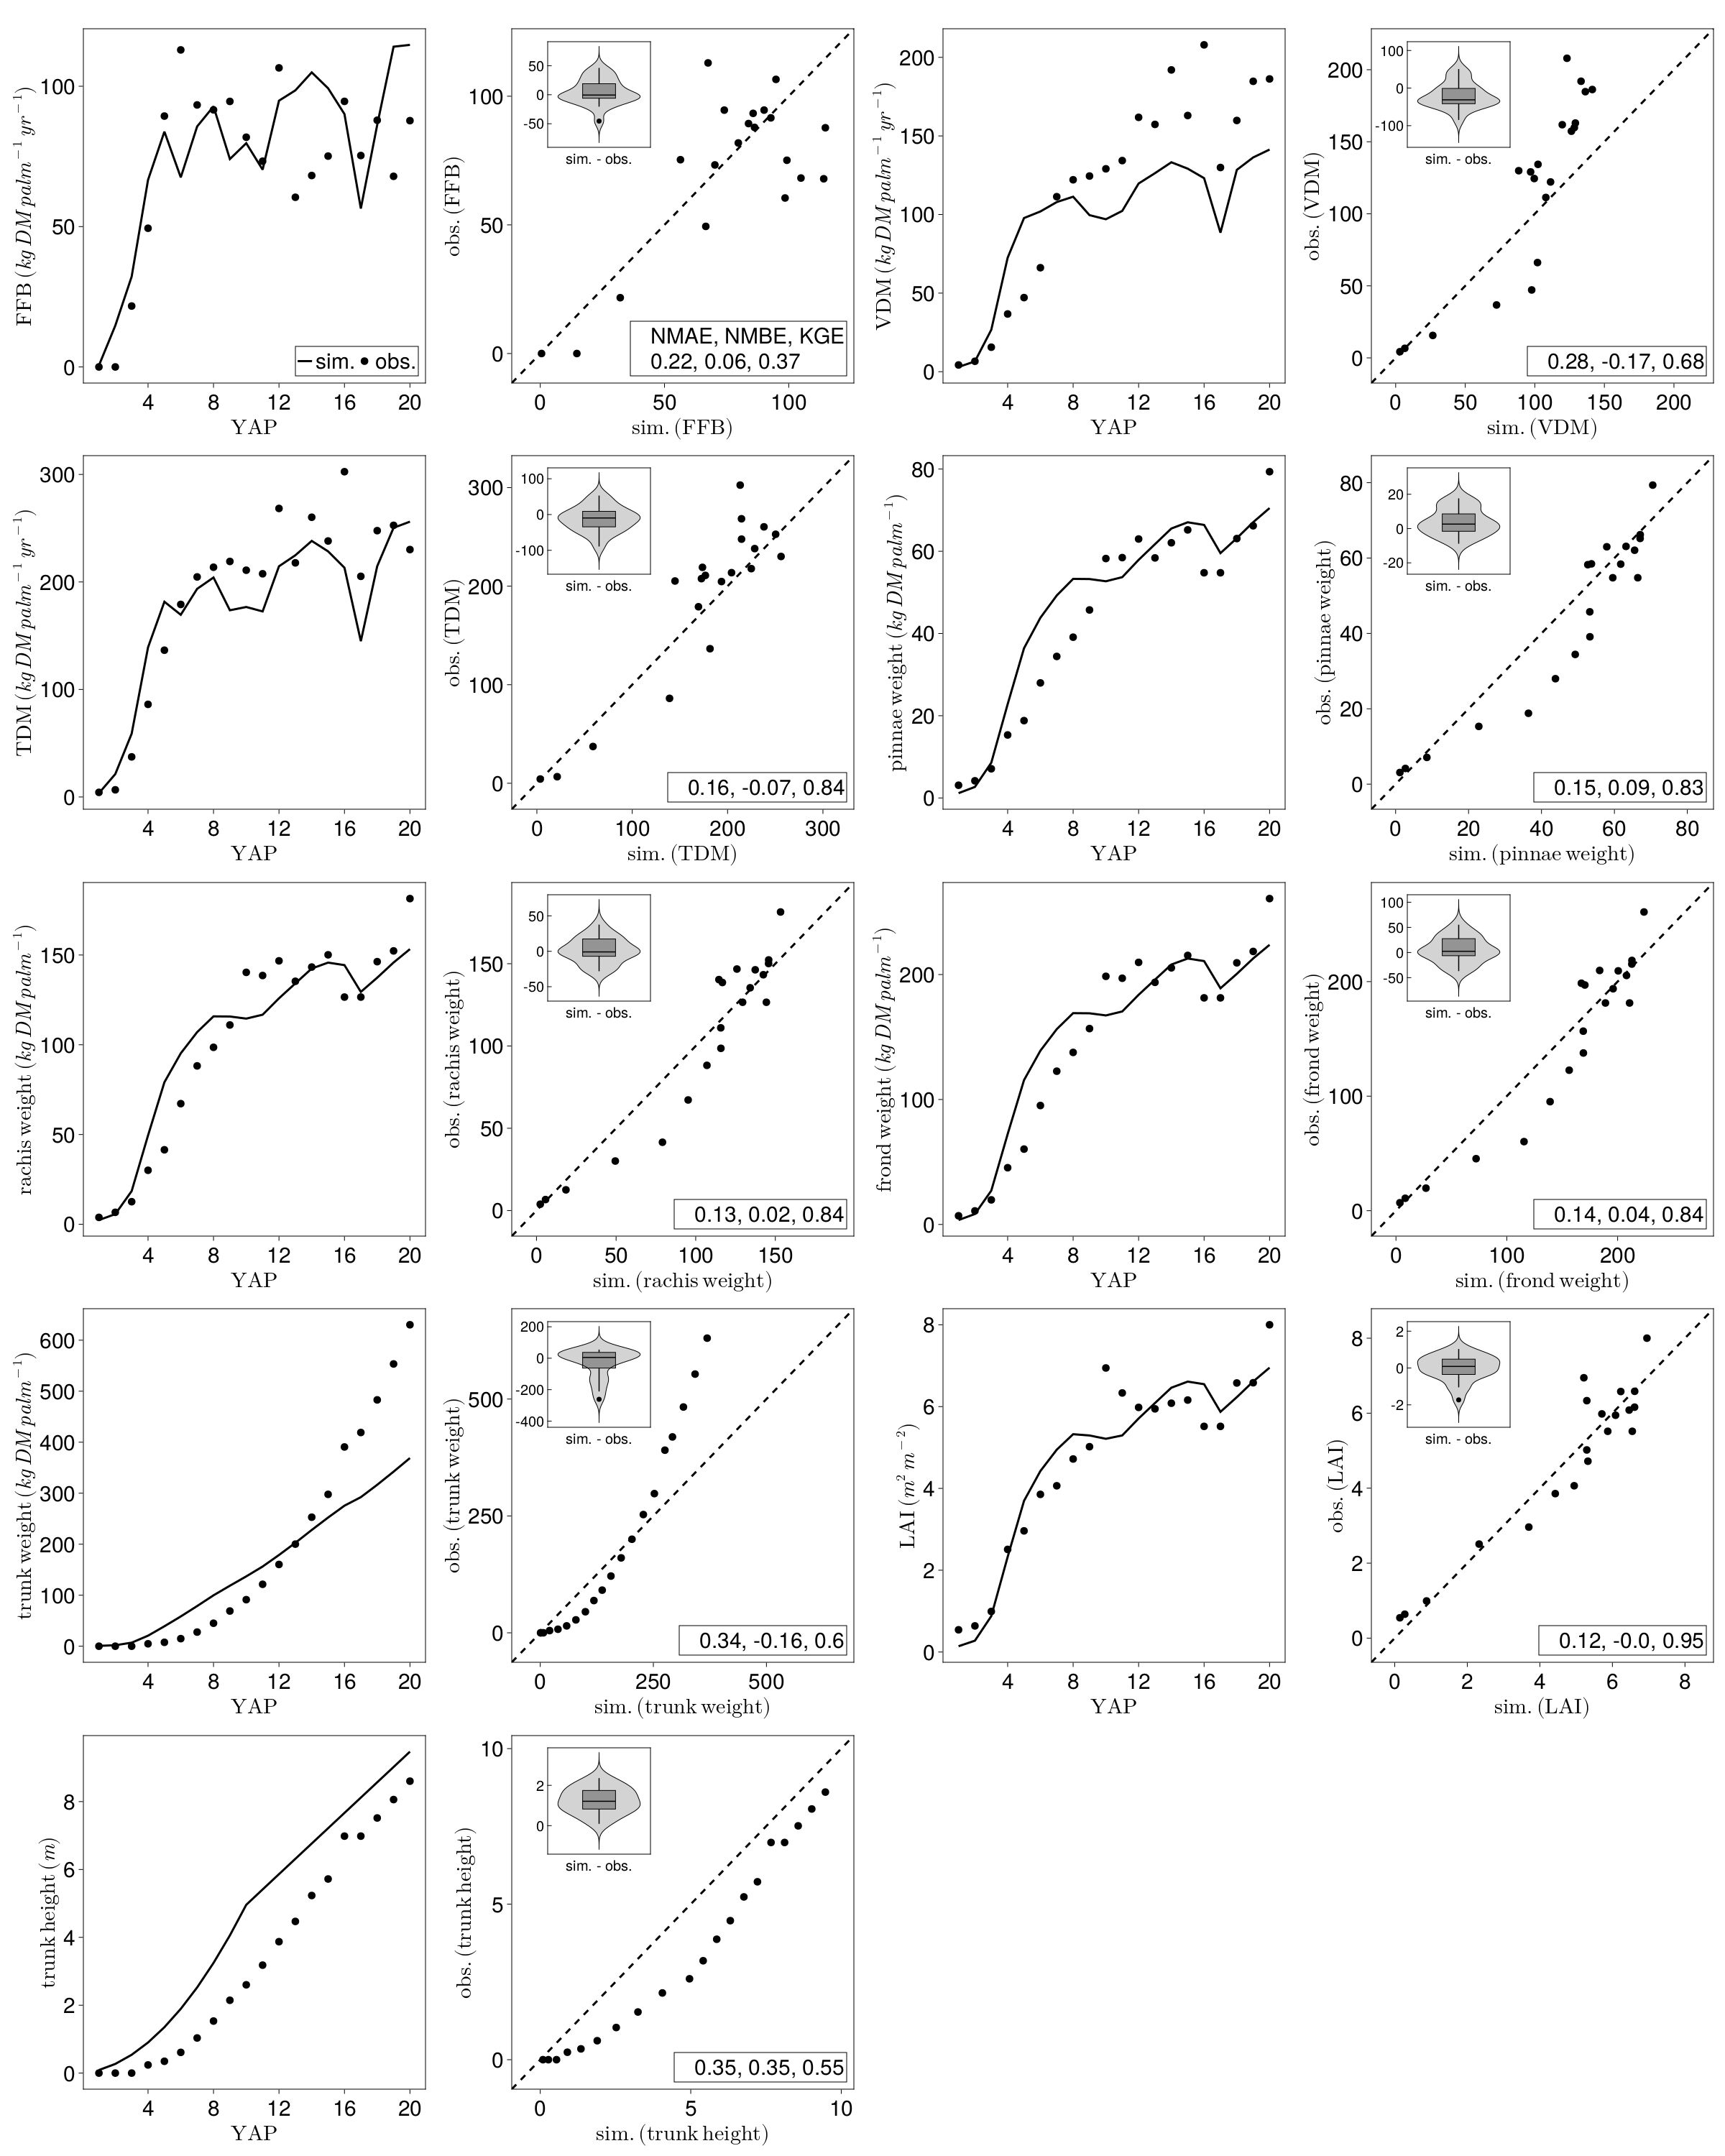

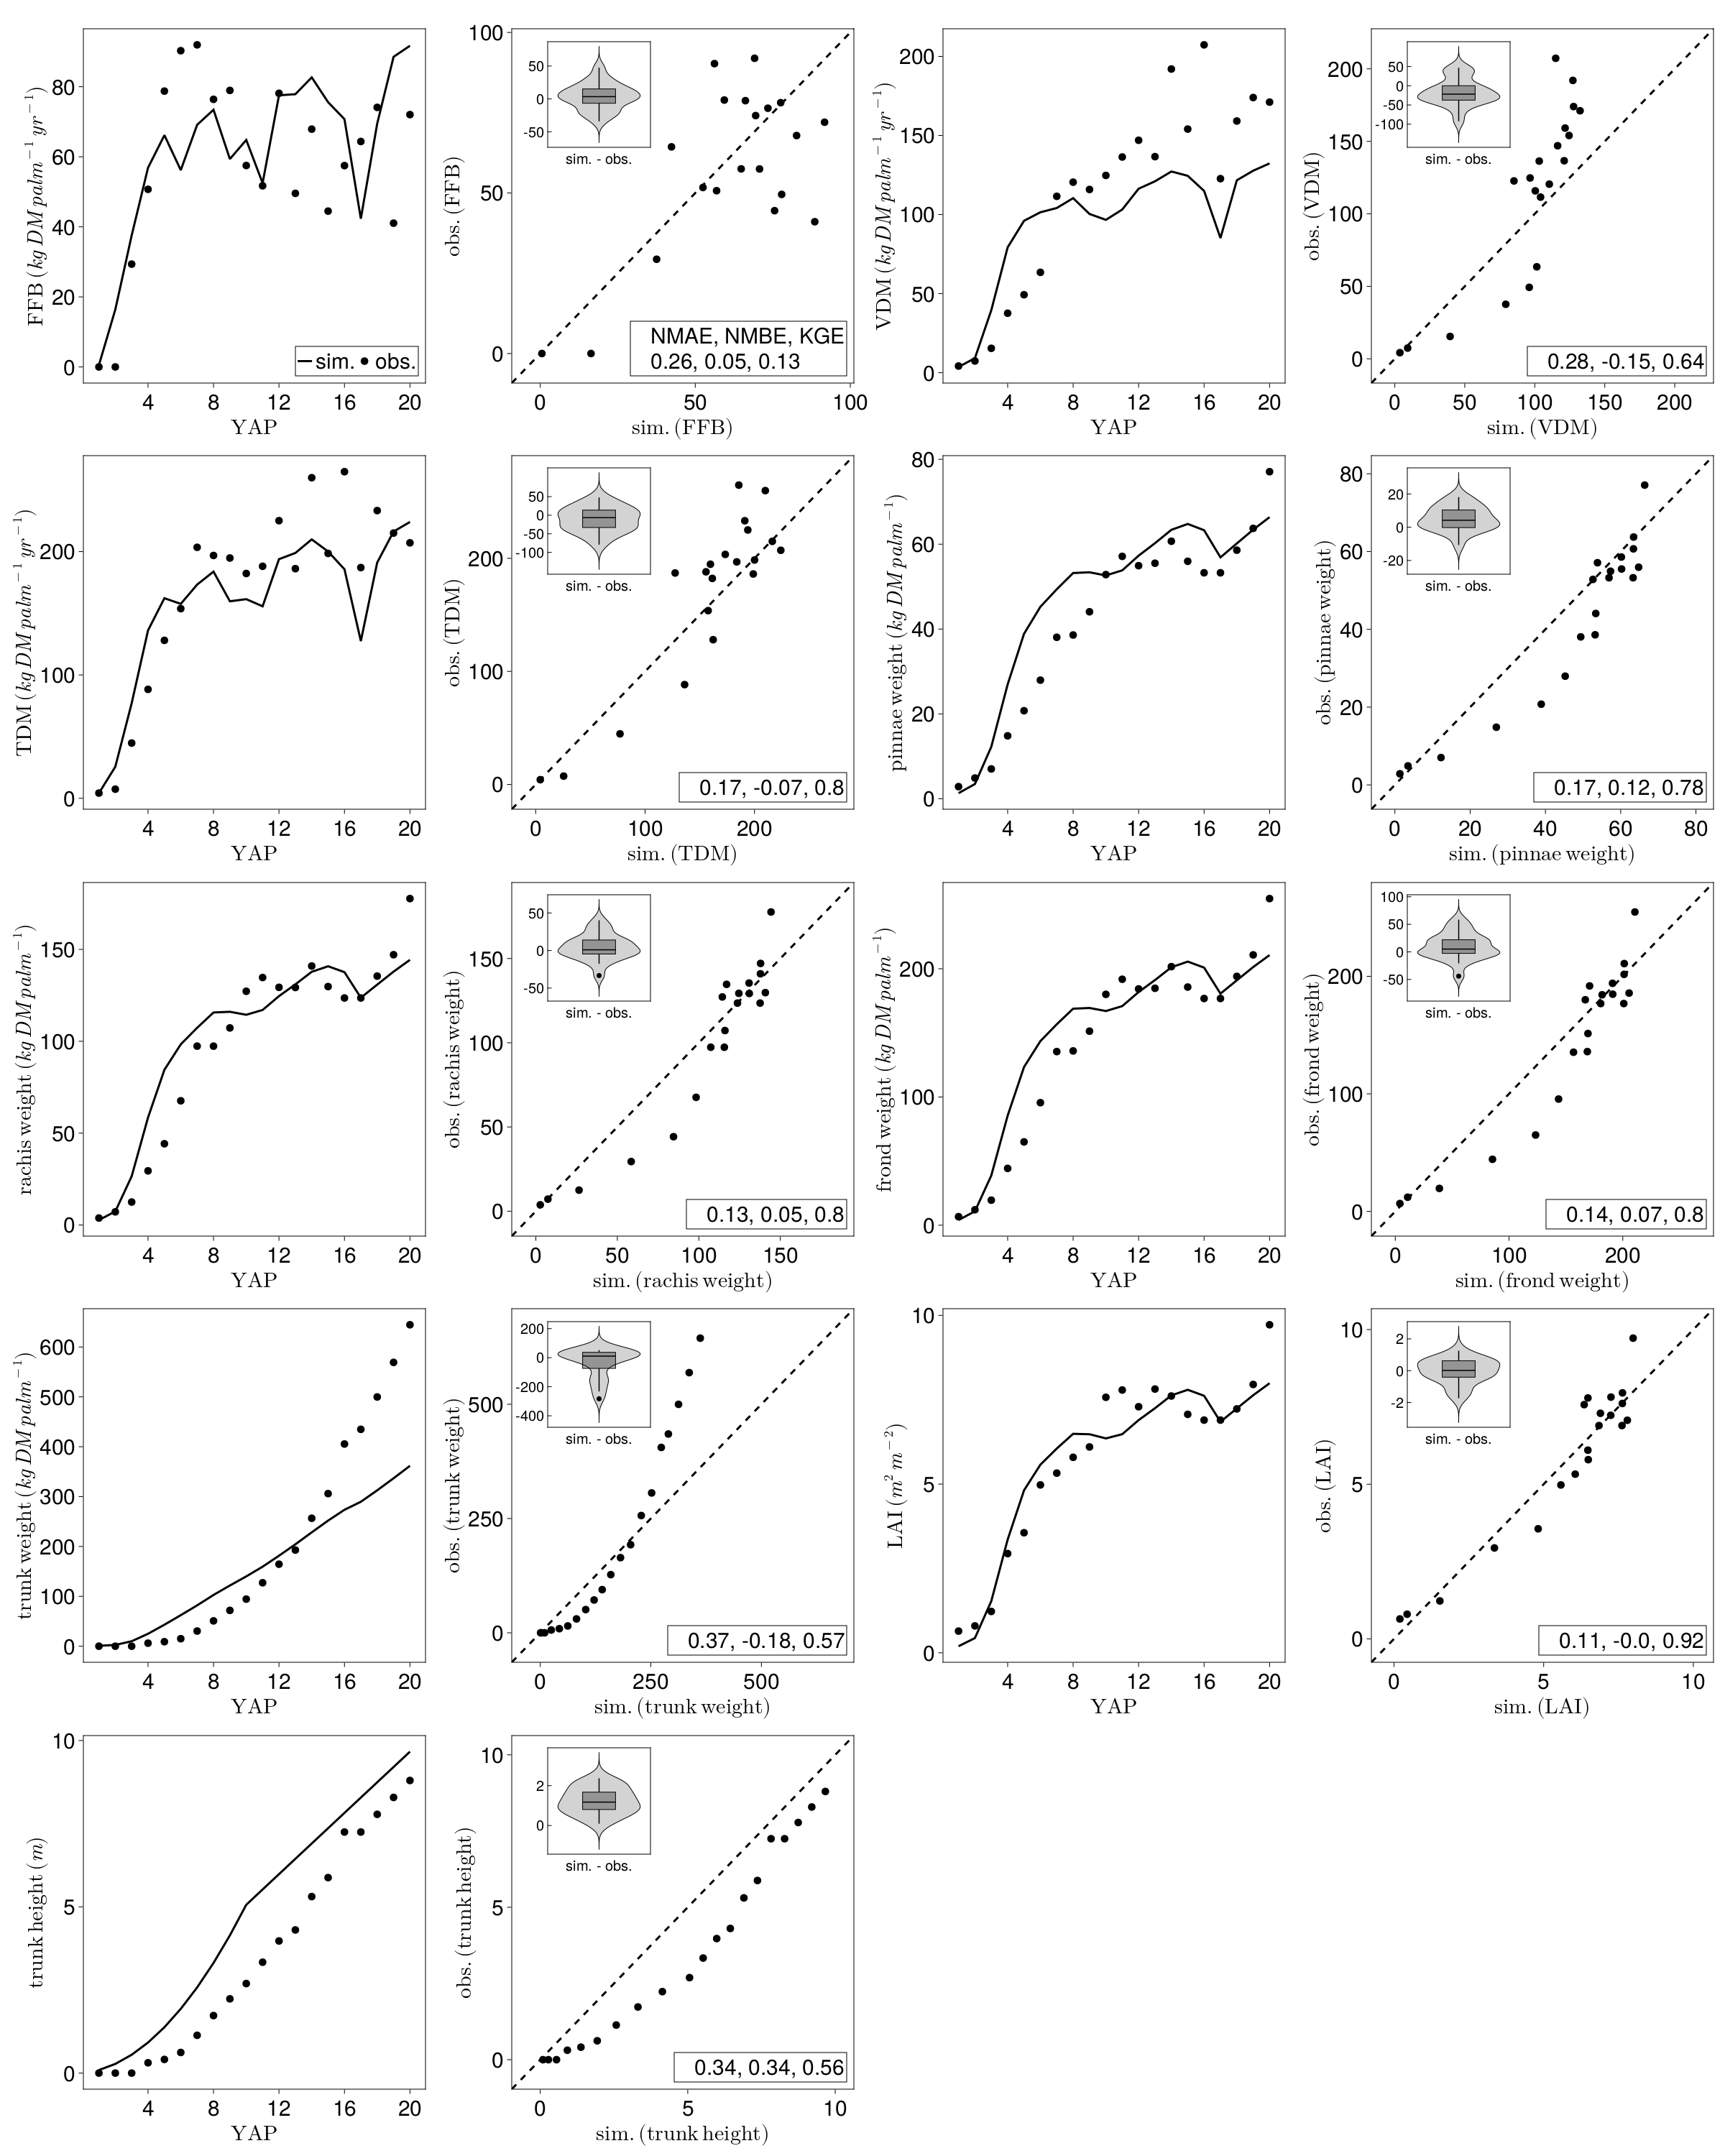

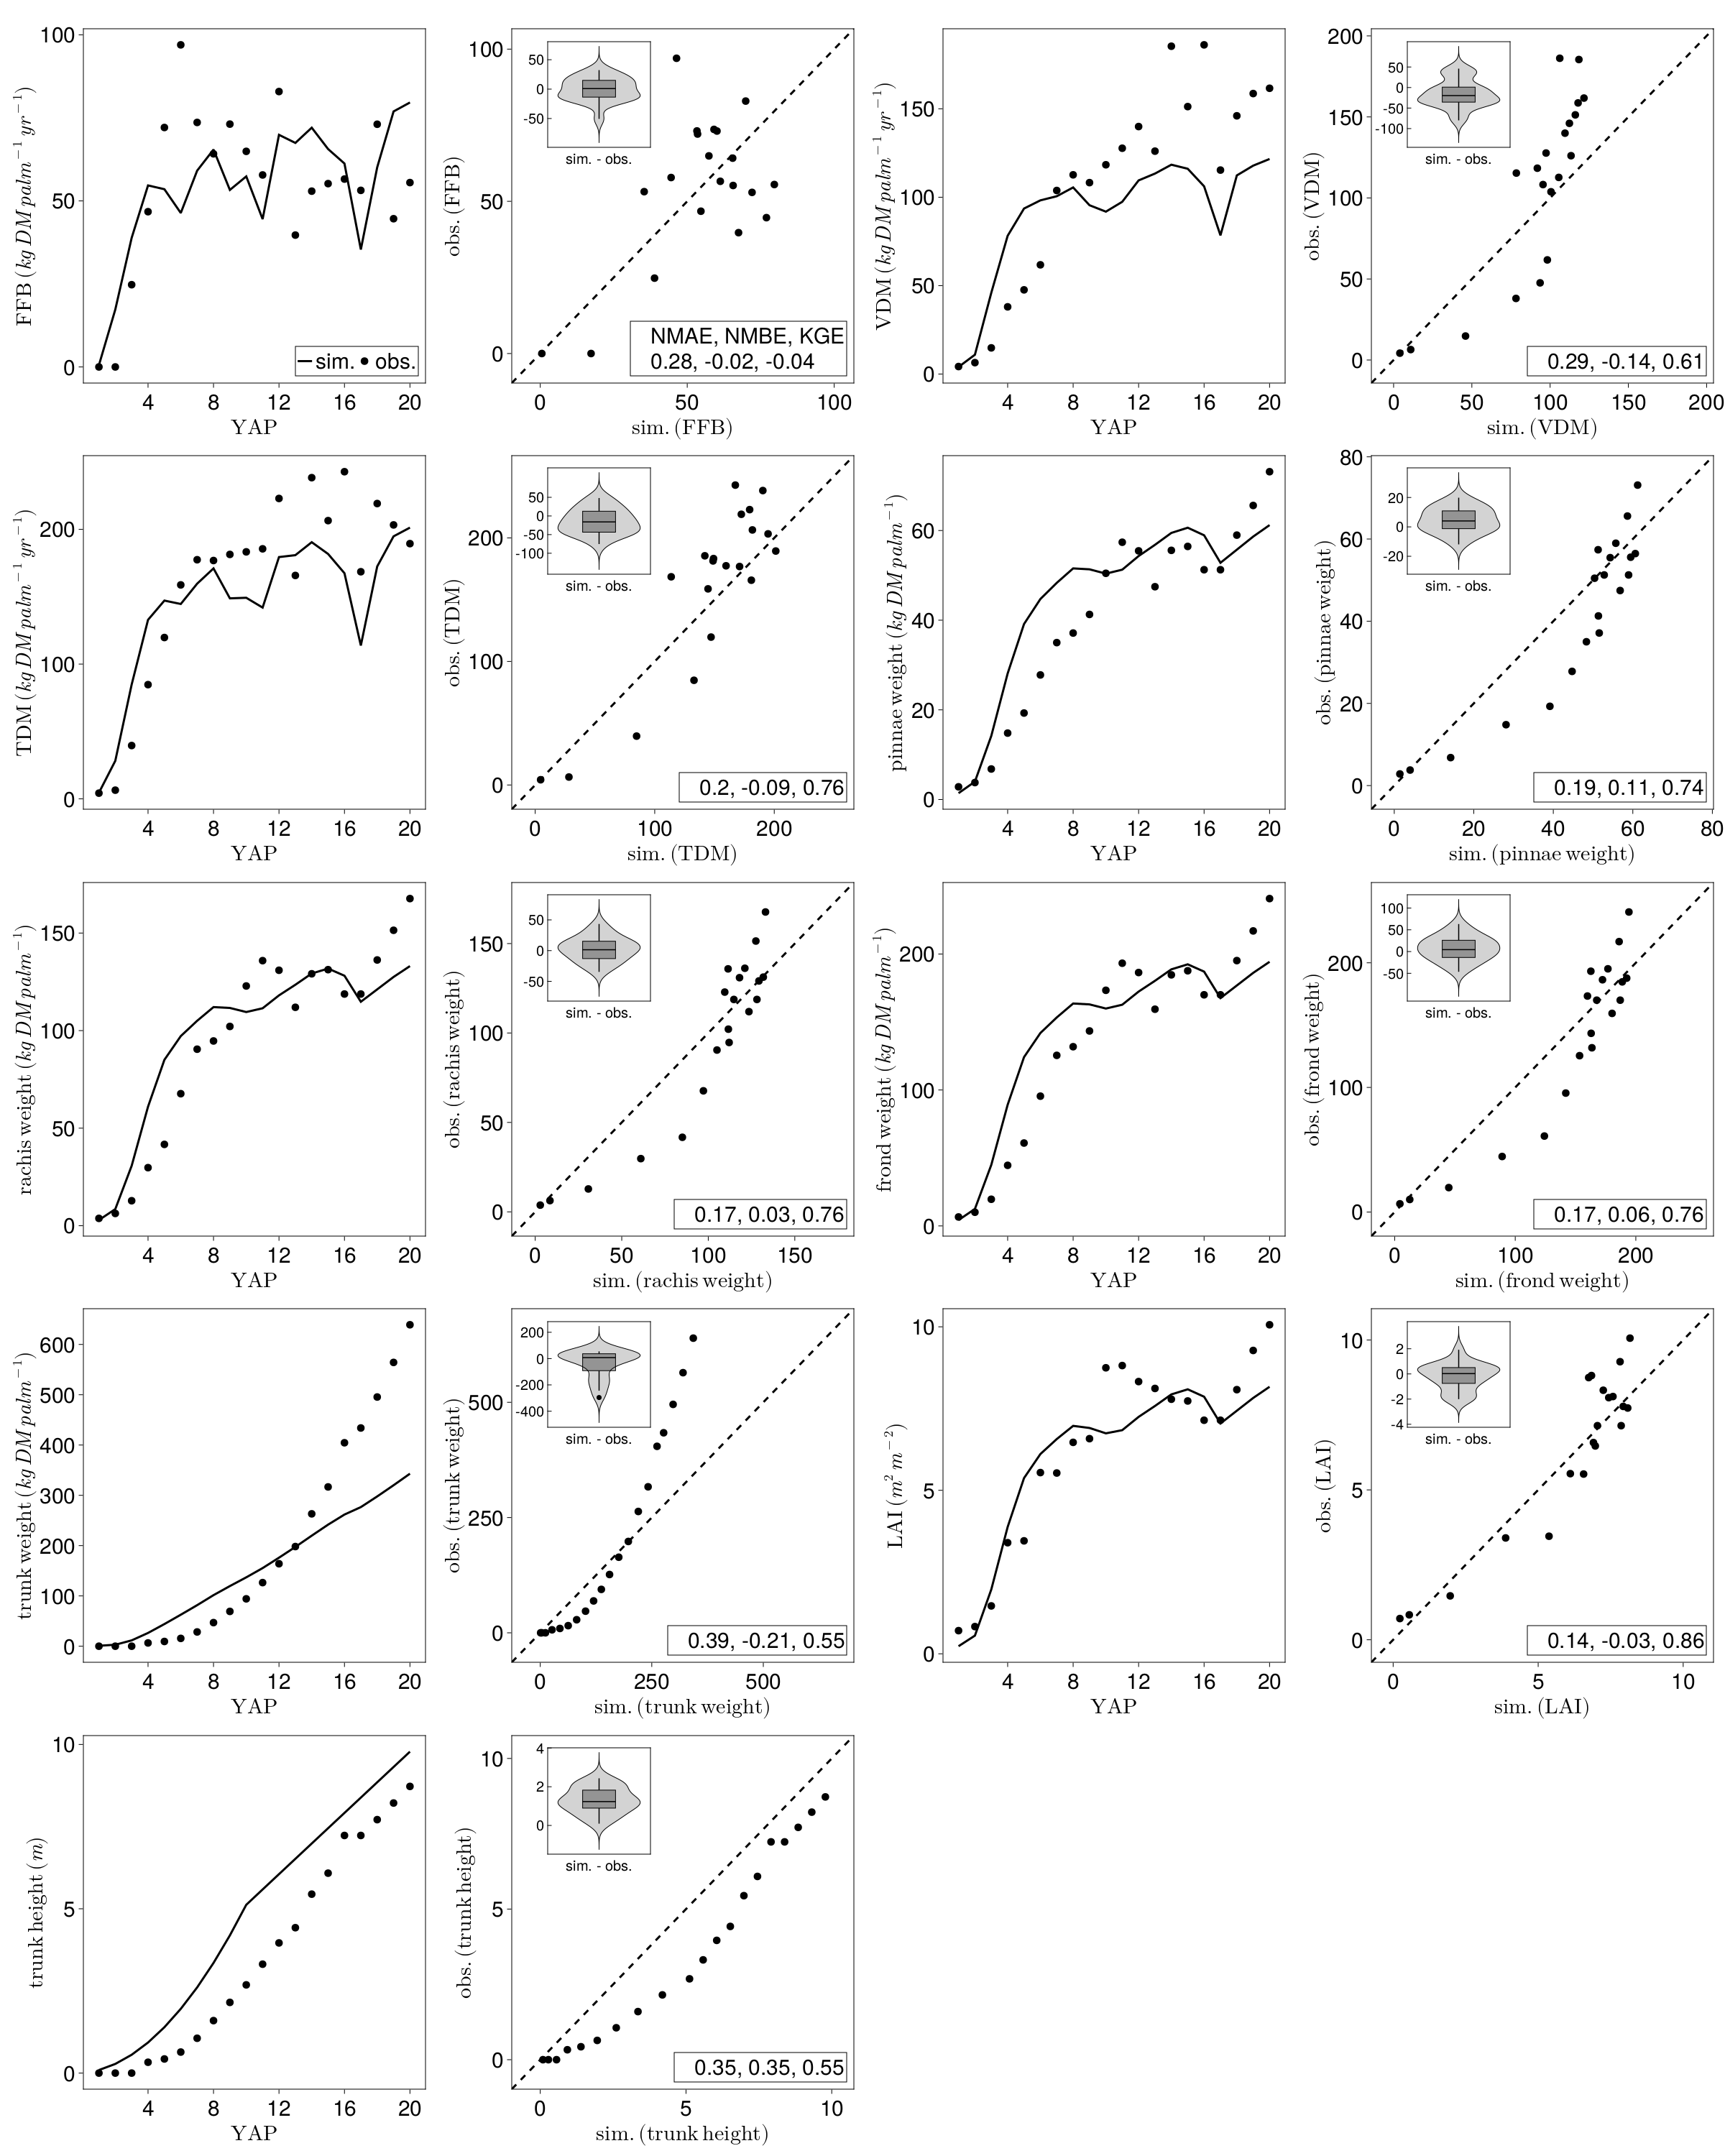

Completed in 7 seconds, 320 milliseconds.


**** PD = 82 ****
9×4 DataFrame
 Row │ param                NMAE     NMBE     KGE     
     │ String               Float64  Float64  Float64 
─────┼────────────────────────────────────────────────
   1 │ yield                  0.303    0.229    0.578
   2 │ vdmgro                 0.308   -0.269    0.69
   3 │ tdmgro                 0.154   -0.039    0.914
   4 │ parts_pinnae_weight    0.138   -0.056    0.917
   5 │ parts_rachis_weight    0.15    -0.121    0.868
   6 │ frdwgt                 0.146   -0.102    0.885
   7 │ parts_trunk_weight     0.284   -0.144    0.673
   8 │ lai                    0.152   -0.141    0.822
   9 │ trunkhgt               0.516    0.516    0.423

**** PD = 90 ****
9×4 DataFrame
 Row │ param                NMAE     NMBE     KGE     
     │ String               Float64  Float64  Float64 
─────┼────────────────────────────────────────────────
   1 │ yield                  0.259    0.198    0.623
   2 │ vdmgro         

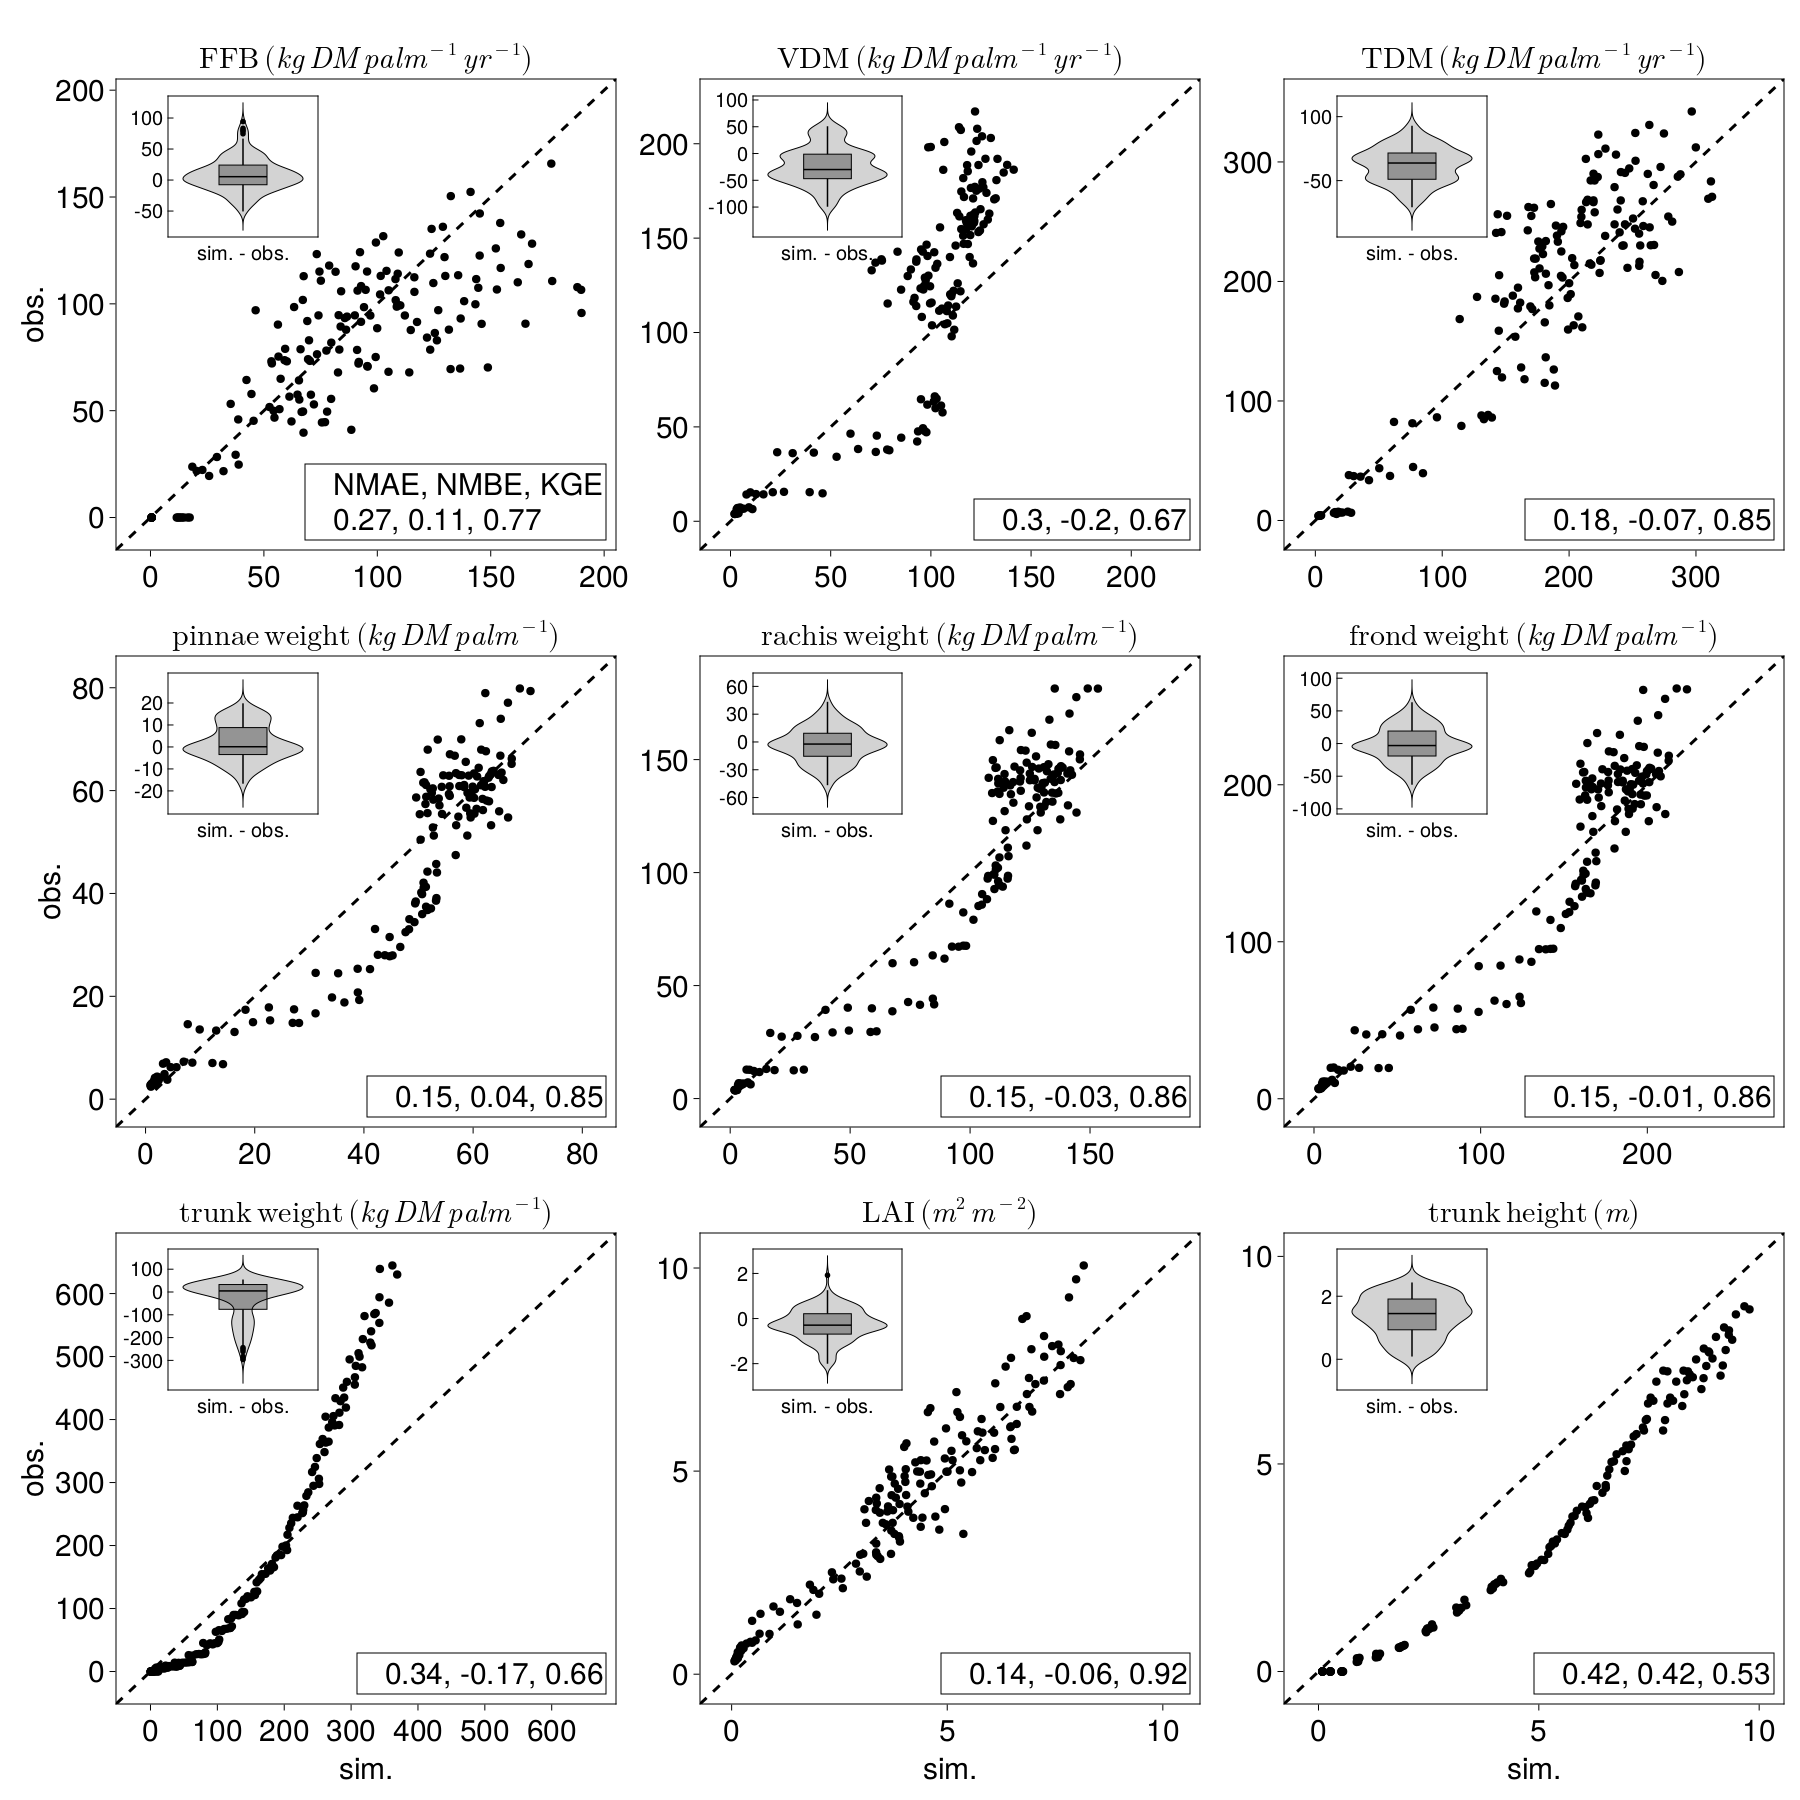

Plotting GoF indexes...


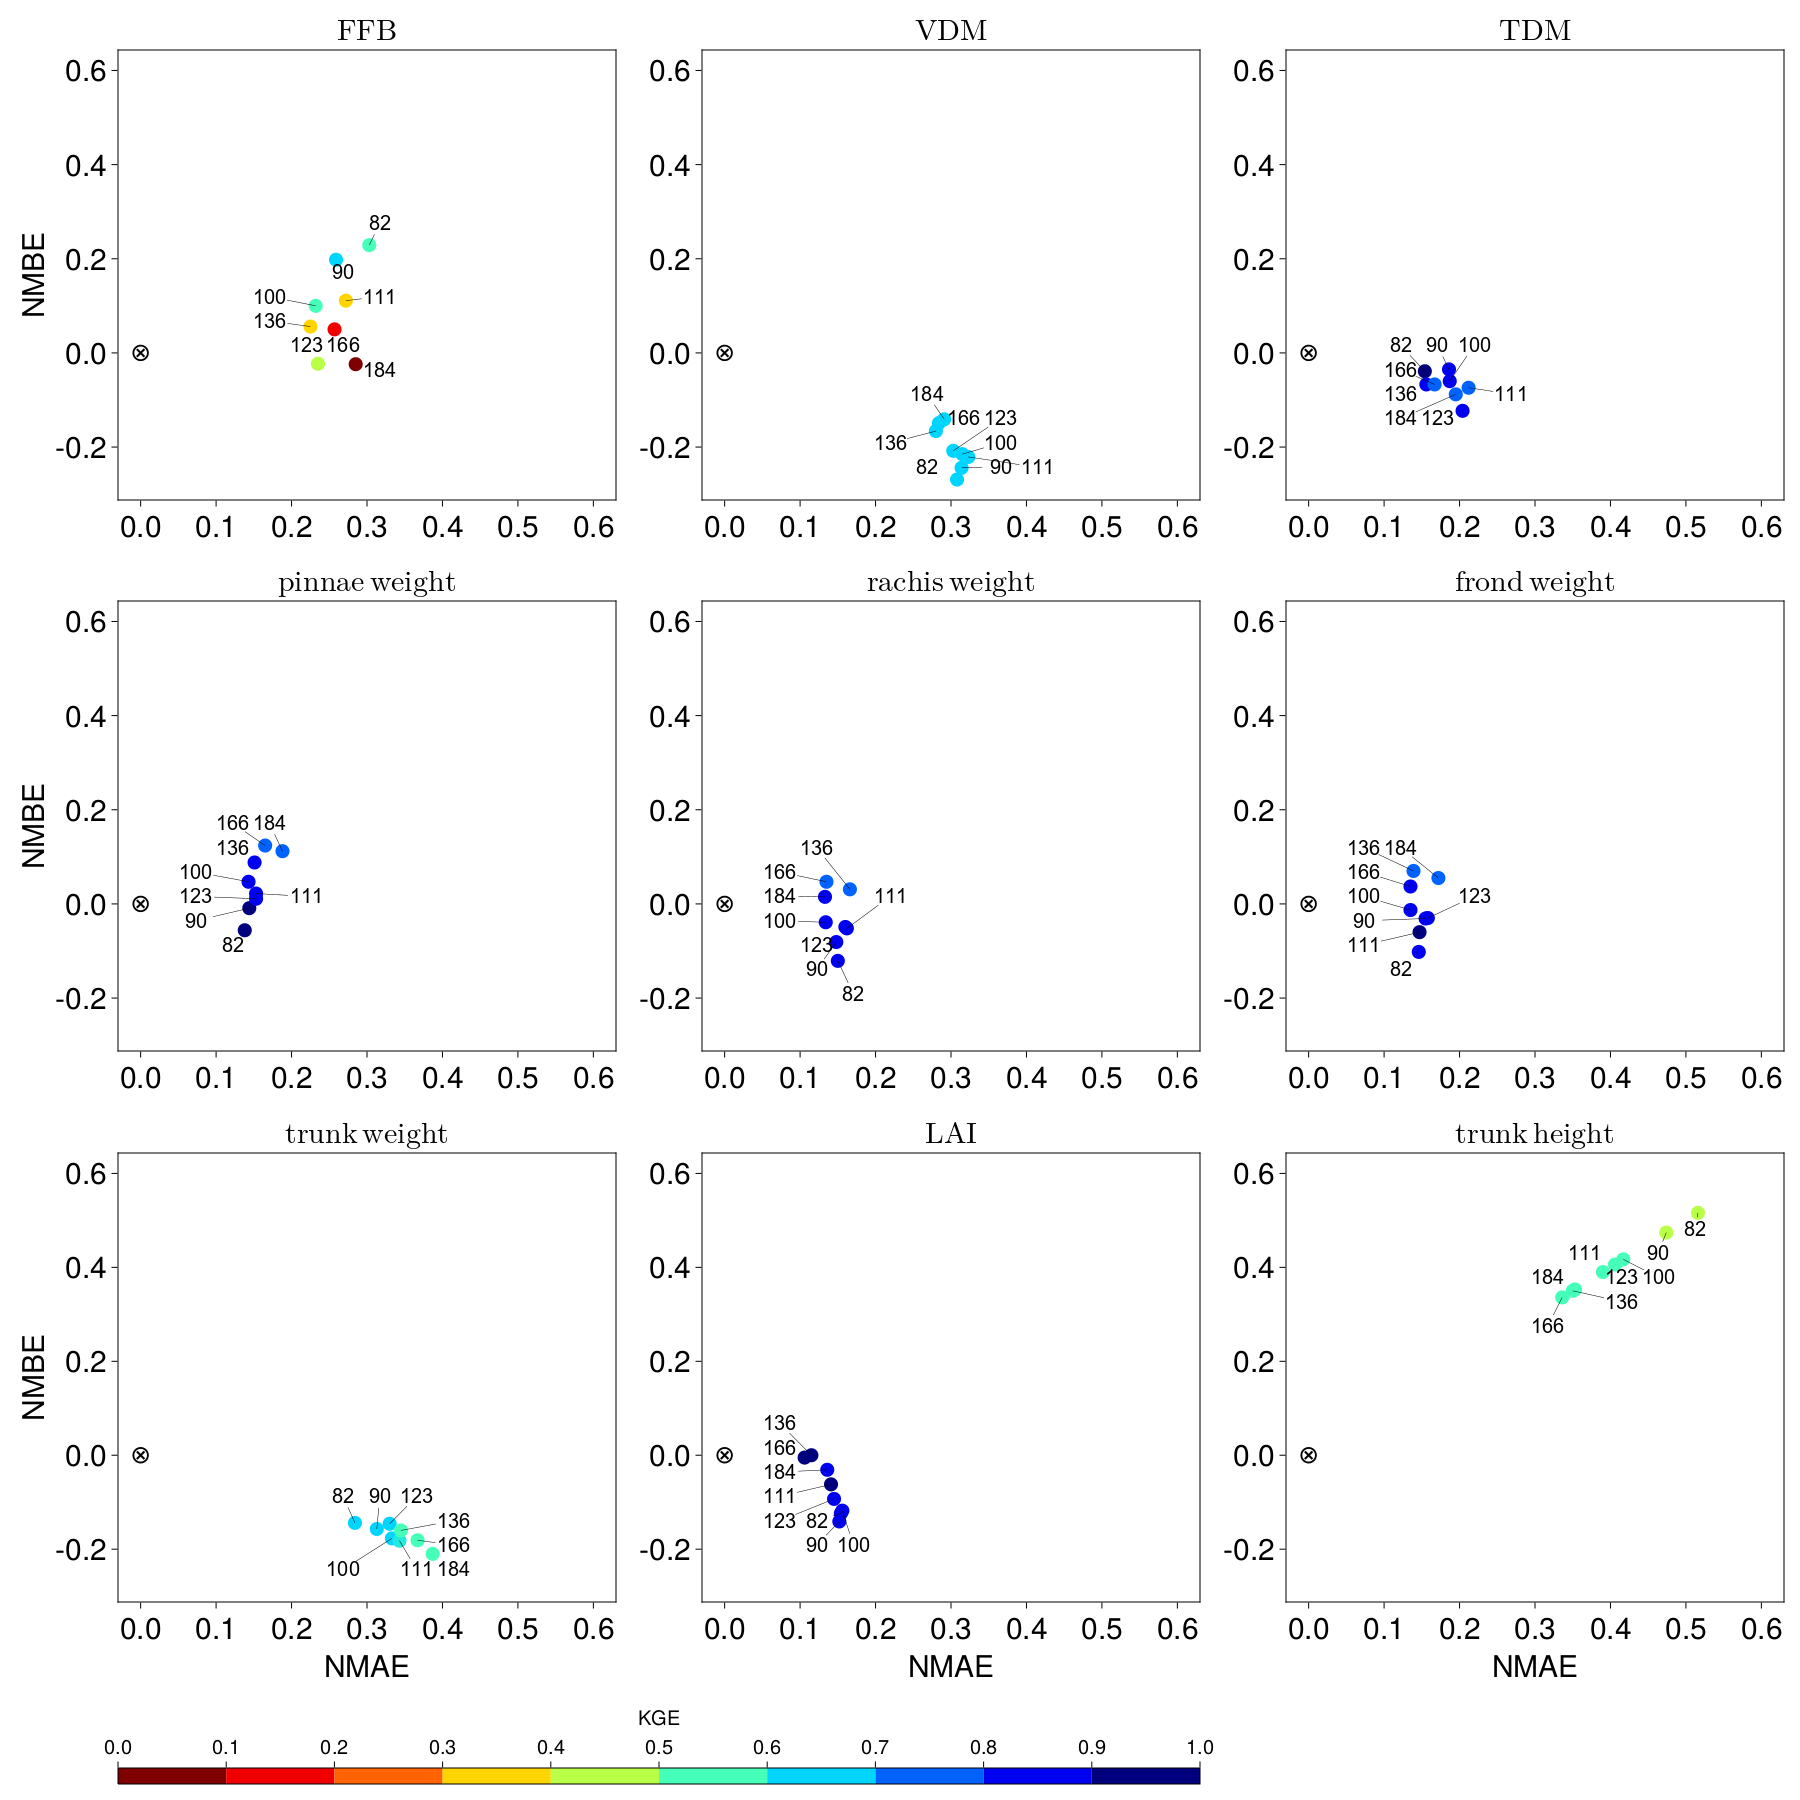

done.


In [6]:
loc = "rengam"
plot_v = true
plot_c = true
plot_g = true
saveplot = false
gof = [GoF.NMAE, GoF.NMBE, GoF.KGE]

pds, dir = site(loc)
jsonfname = dir * "input.json"

println("Site = $loc")
println("Planting densities = $pds")
println("Input JSON file = $(pwd())/$jsonfname")

out1 = multirun(jsonfname, loc, pds;
                gof=gof,
                plot_valid=plot_v, saveplot_valid=saveplot,
                plot_combo=plot_c, saveplot_combo=saveplot,
                plot_index=plot_g, saveplot_index=saveplot)

println("done.")

### EXPLORE: TMAX, DIFFUSE RAD VS. ASSIMILATES

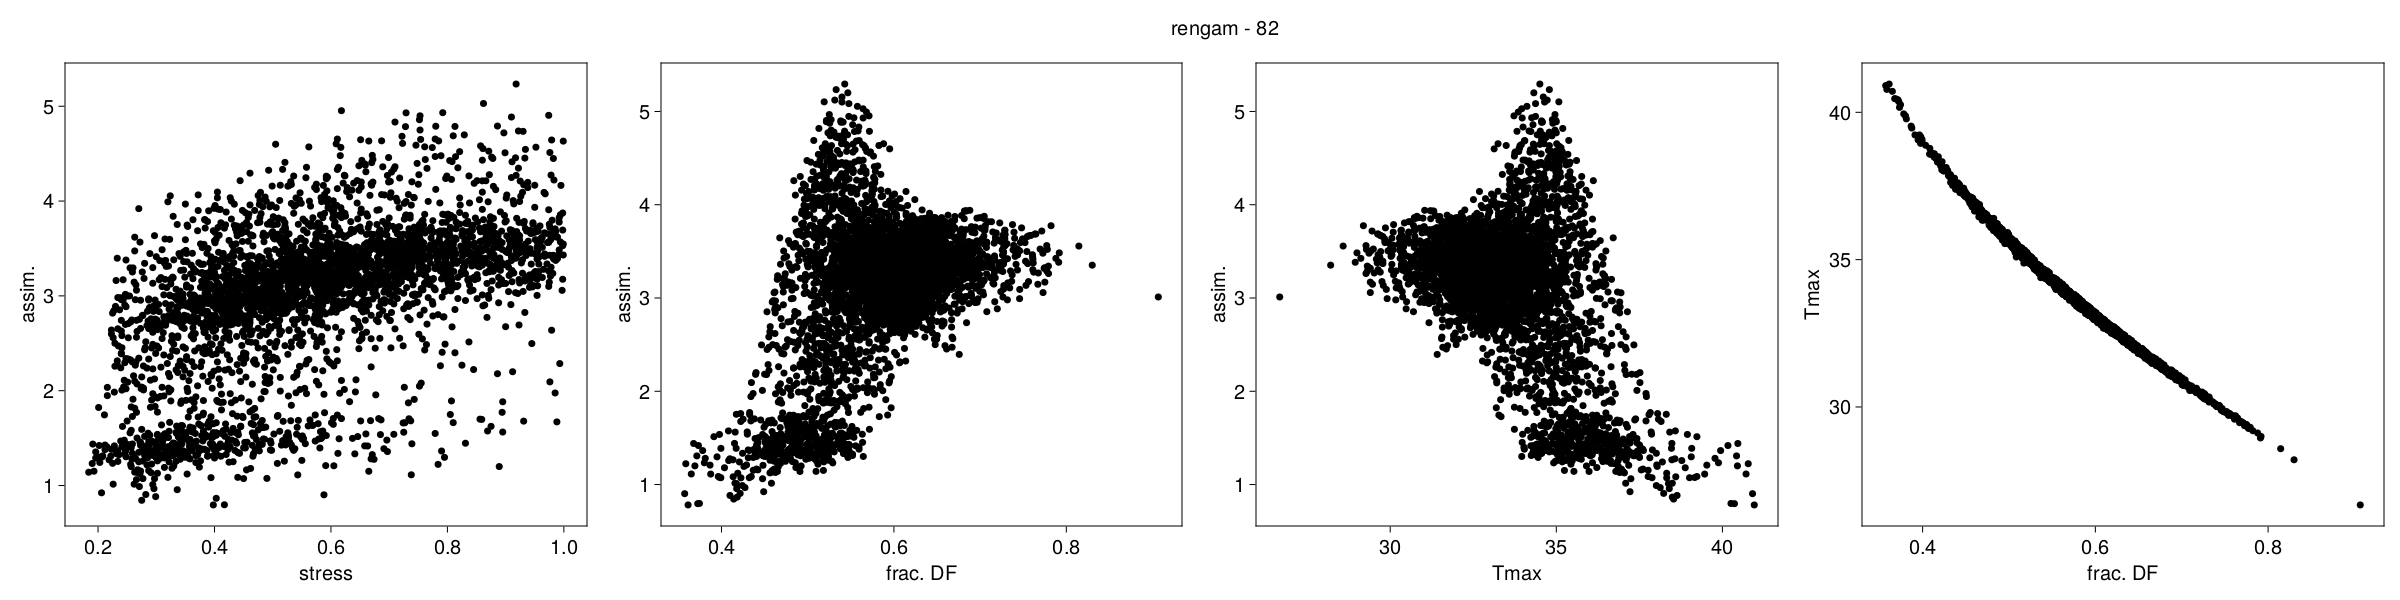

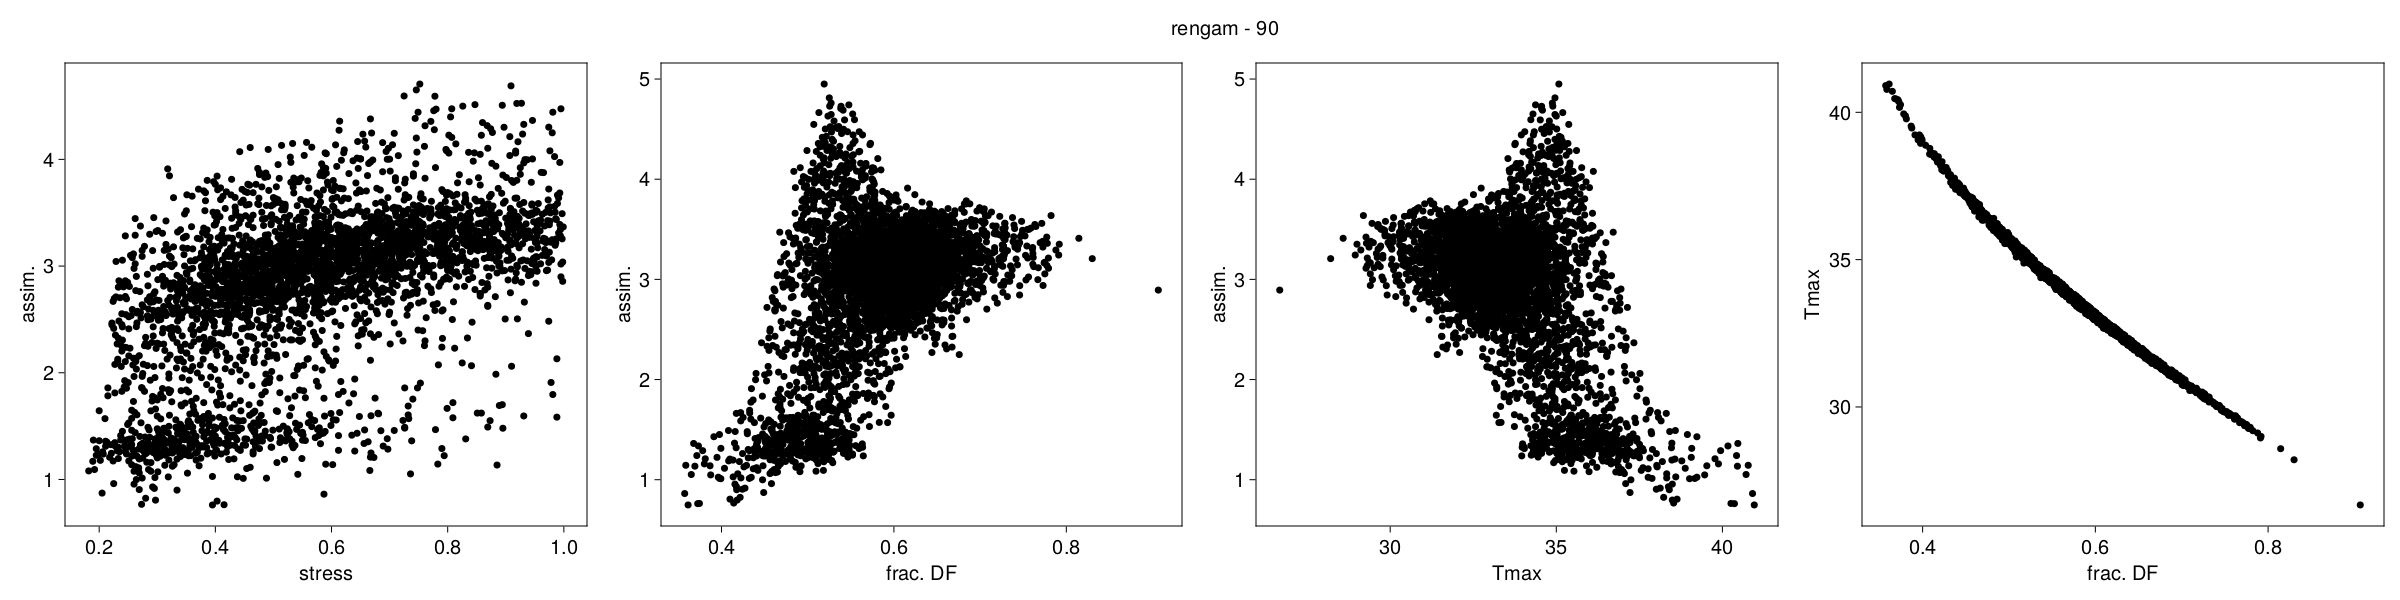

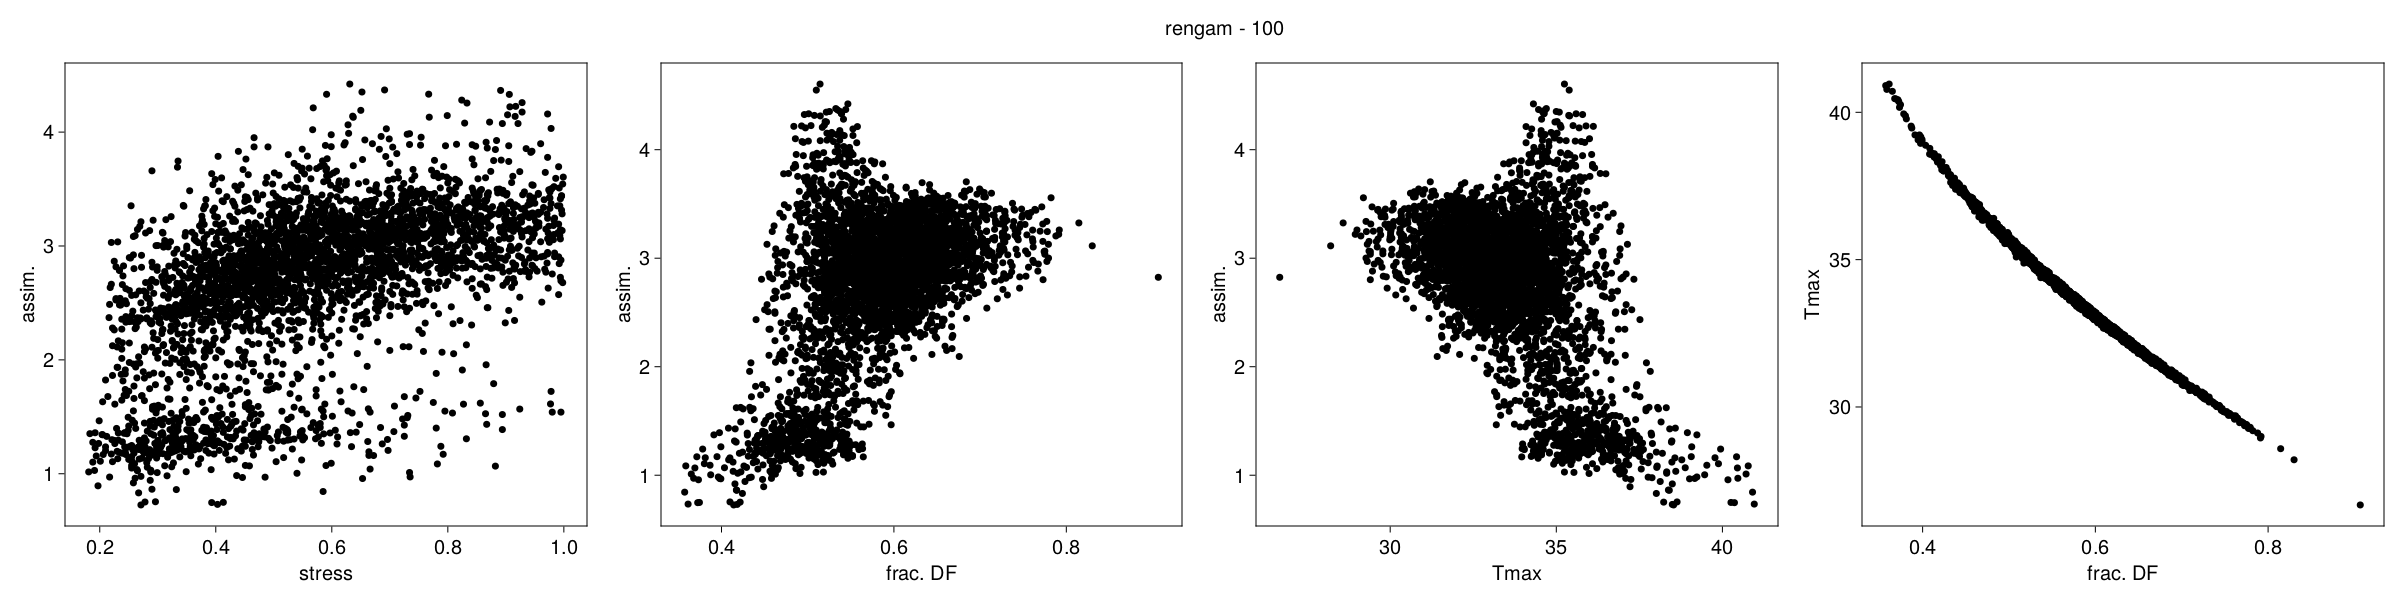

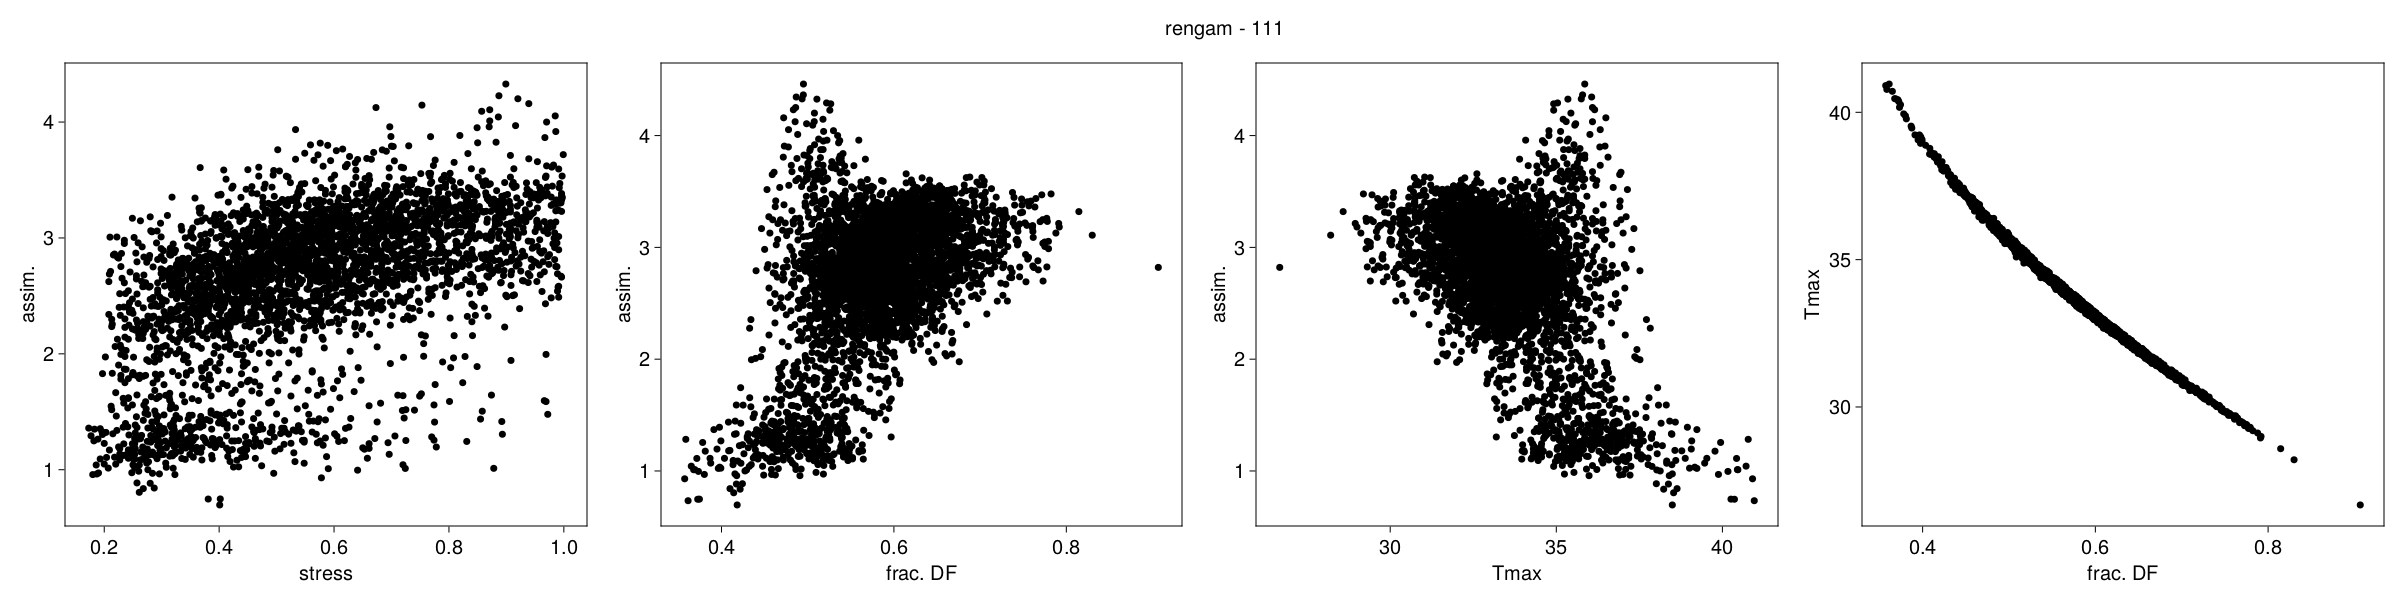

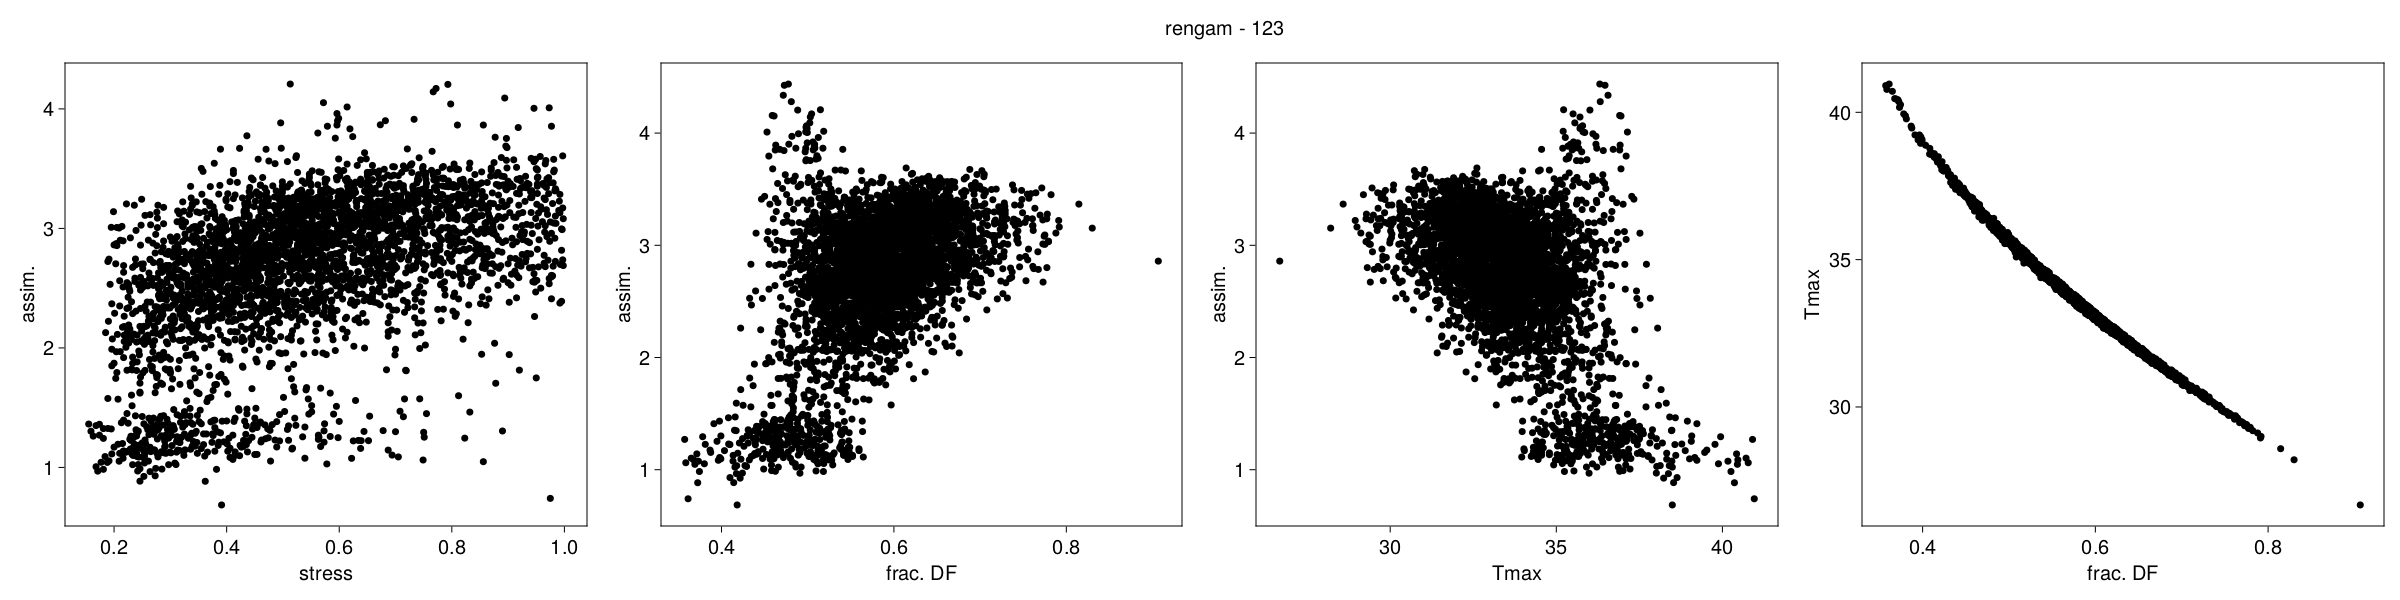

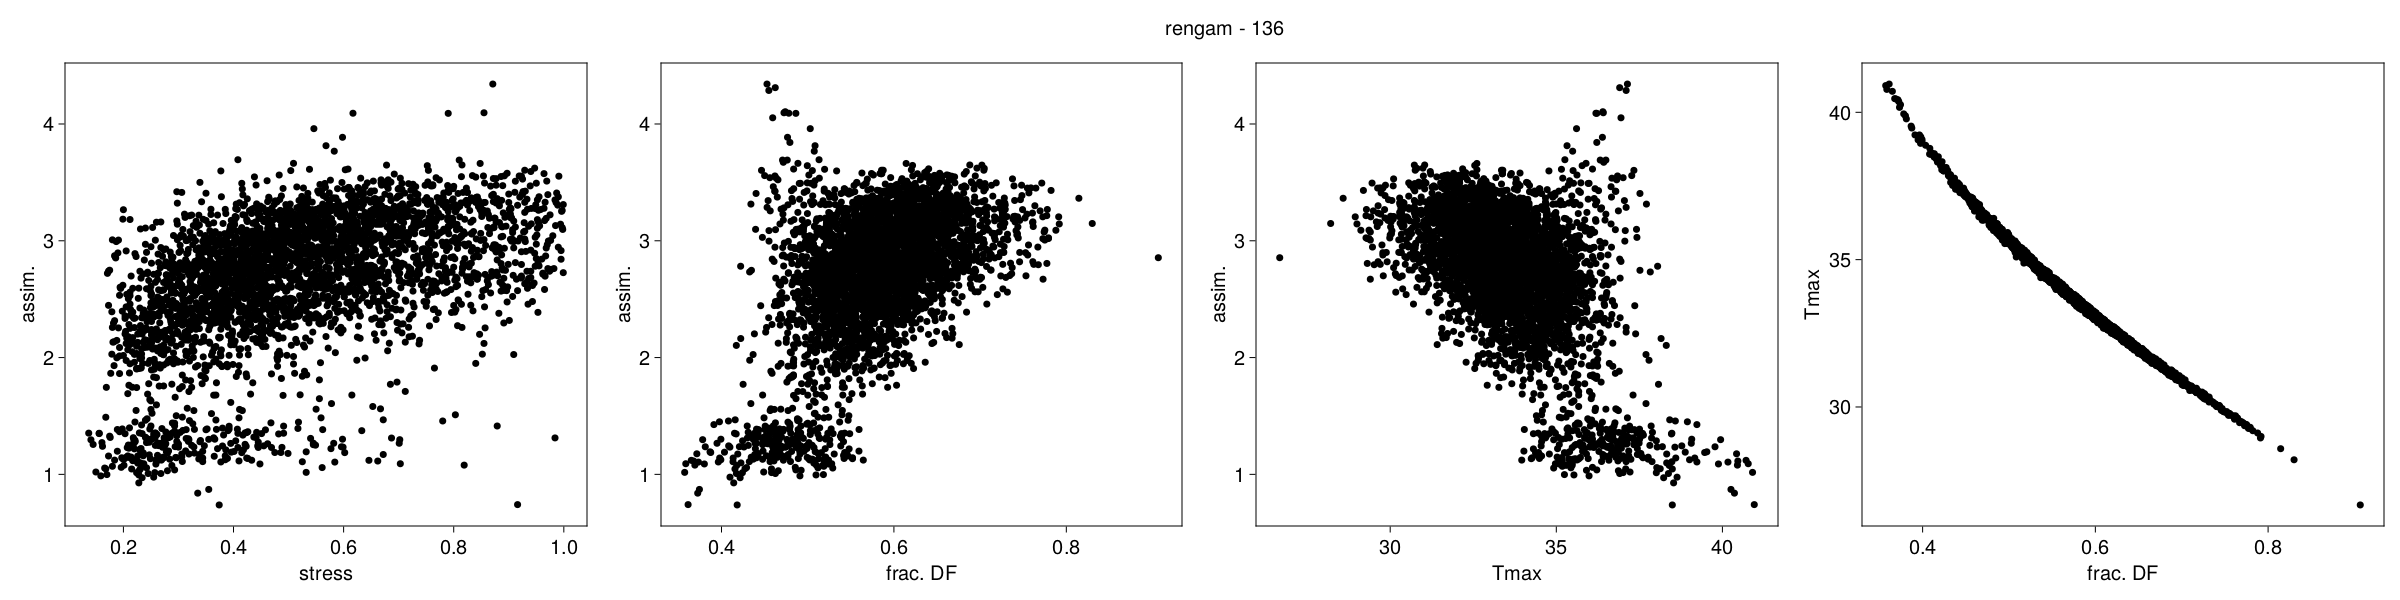

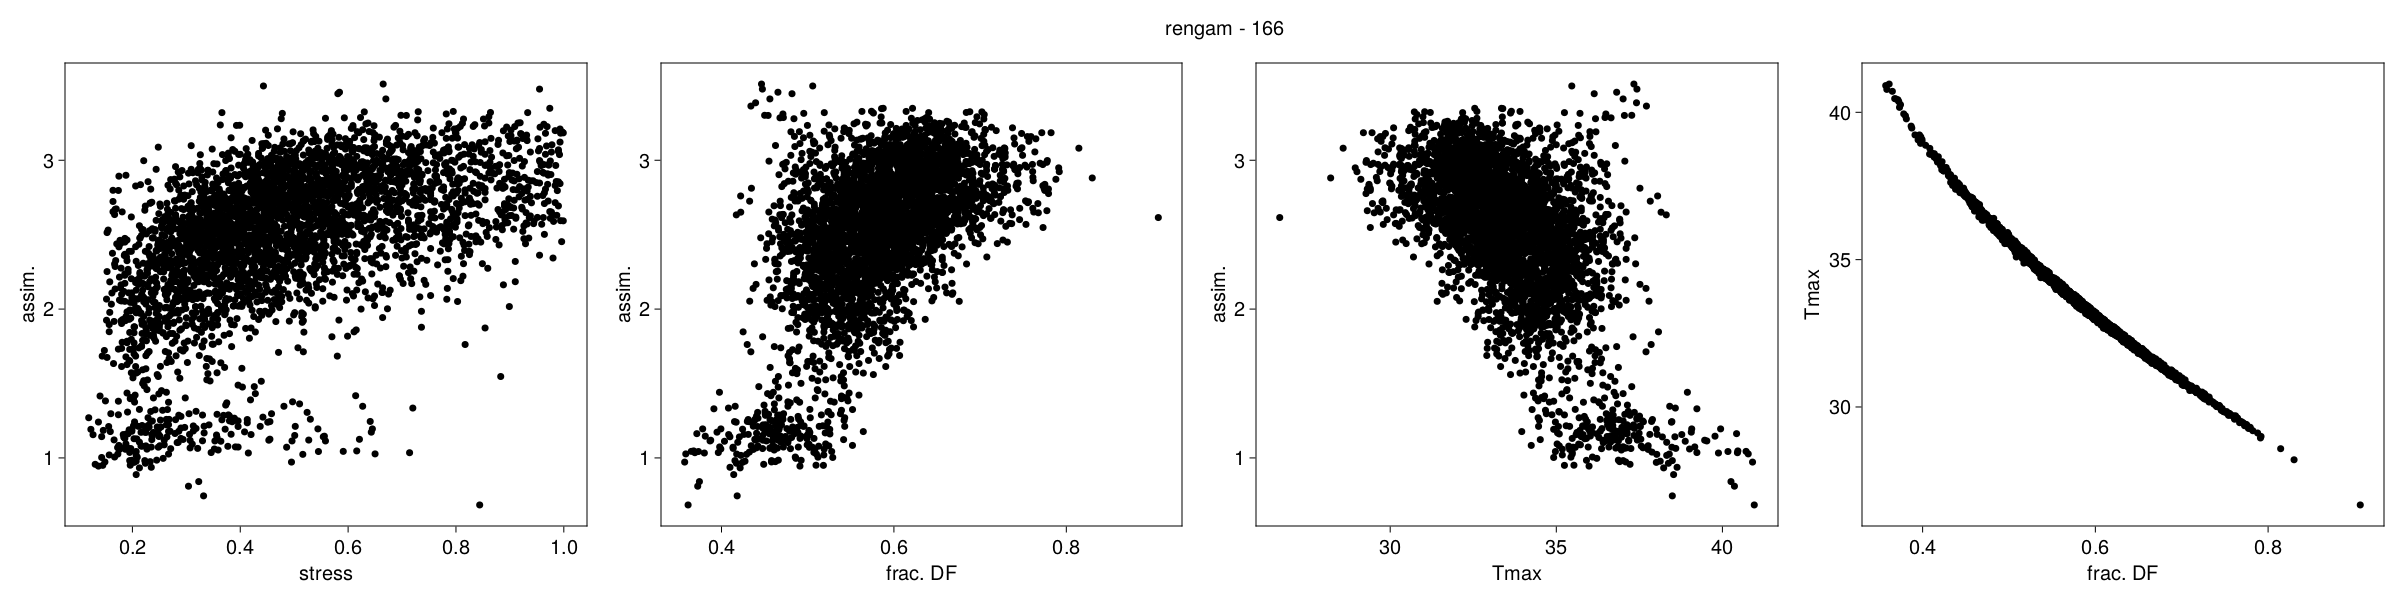

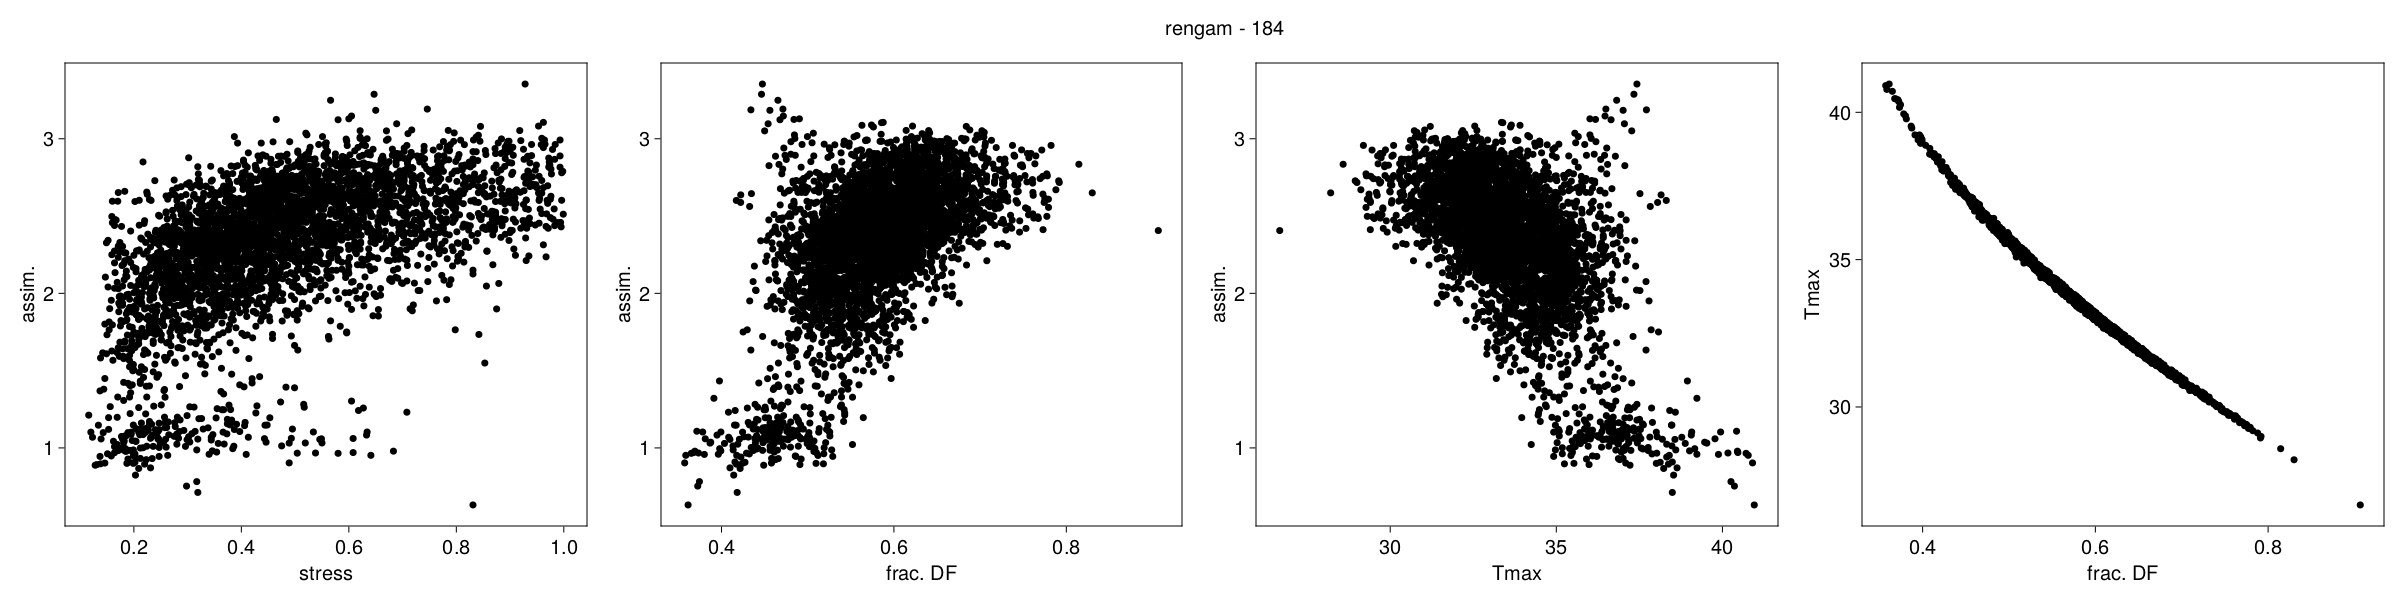

In [7]:
for res in out1.res
    mat = filter(:yap => y -> y >= 10, res.daly)
    matf = filter(:stress_t => y -> y < 1, mat)
    dfrad = mat.dfrad ./ mat.totrad

    xys = []
    push!(xys, (matf.stress_t, matf.assimilates, ("stress", "assim.")))
    push!(xys, (dfrad, mat.assimilates, ("frac. DF", "assim.")))
    push!(xys, (mat.tmax, mat.assimilates, ("Tmax", "assim.")))
    push!(xys, (dfrad, mat.tmax, ("frac. DF", "Tmax")))
    title = "$loc - $(unique(res.daly.plantdens)[1])"
    explore(xys; title=title)
end


### RUN MODEL: All Sites

In [ ]:
gof = [GoF.NMAE, GoF.NMBE, GoF.KGE]
out2 = all_sites(gof)
println("done.")